In [1]:
%matplotlib nbagg
import pandas as pd
import os, sys
import numpy as np
from collections import defaultdict
from caseDetection import detect_case
from world_map_maker import create_world_map
import matplotlib
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 14}
matplotlib.rc('font', **font)
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2
#import matplotlib as mpl
#mpl.use("GTK3cairo")
#import matplotlib.pyplot as plt
#plt.plot([1,2,3,4],'*-')

In [2]:
SAMPLENAME = 'Snapshot1'
RESULTS = "results/" + SAMPLENAME + "/"
if not os.path.exists(RESULTS):
    os.makedirs(RESULTS)

In [6]:
df_case_count = pd.read_pickle(RESULTS + "case_count_Snapshot1.pkl")
df_case_count.head(10)

case                    0  1   2  3  4  total
country subcat                               
AE      adult           4  2  18  2  2     28
        arts            6  1  19  0  3     29
        business        7  0   7  0  4     18
        circum          0  0   9  1  1     11
        computers       4  1  11  5  1     22
        games           4  0  14  4  2     24
        health          4  1  11  4  1     21
        home            2  2  17  1  0     22
        kids_and_teens  2  1   7  1  0     11
        news            3  0   6  1  1     11

#### Censorship by country for each subcat
- create num(subcat) bar plots comparing case2 with (case1 + case3)

In [7]:
# clear all except df_case_count
#del df, df_bad, df_case_default, df_current, df_good, df_merged_unique_cases, df_obs_per_country, df_redo
#del df_sIP_CO, df_temp, df_unique, df_unique_sIP_per_country

In [8]:
group_by_subcat = df_case_count.reset_index().groupby('subcat')

### Per Subcategory Analysis, including errors

In [11]:
def get_ratios(subcat, indices, df_case_count):
    #if subcat == 'all':
        
    temp_df = df_case_count.ix[ group_by_subcat.groups[subcat] ].reset_index()
    temp_df['censored'] = temp_df[1]+temp_df[3]
    temp_df['unknown'] = temp_df[0]+temp_df[4]
    temp_df = temp_df.rename(columns={2:'uncensored'})[['country', 'censored', 'uncensored', 'unknown']].set_index('country')

    # calculate ratios
    temp_df['total'] = temp_df.sum(axis=1)
    temp_df['ratio-censored'] = temp_df['censored']/(temp_df['total'])
    temp_df['ratio-uncensored'] = temp_df['uncensored']/(temp_df['total'])
    temp_df['ratio-unknown'] = temp_df['unknown']/(temp_df['total'])

    # replace no entries with 0
    df_country_case = temp_df.fillna(0)
    return df_country_case

In [12]:
country_case_per_subcat = defaultdict(int)

# iterate over groupby object, indices
for subcat, indices in group_by_subcat.groups.iteritems():
    country_case_per_subcat[subcat] = get_ratios(subcat, indices, df_case_count)
    print subcat, len(country_case_per_subcat[subcat])
    
df_country_case_subcat = pd.concat(country_case_per_subcat)

science 139
arts 139
regional 139
shopping 139
reference 139
business 139
world 139
kids_and_teens 139
computers 139
recreation 139
sports 139
society 139
games 139
adult 139
home 139
health 139
news 139
vpn 139
circum 139


In [13]:
all_results = list(df_country_case_subcat.columns)
print all_results

['censored', 'uncensored', 'unknown', 'total', 'ratio-censored', 'ratio-uncensored', 'ratio-unknown']


In [18]:
censorship_ratio = defaultdict(int)
for key in all_results:
    censorship_ratio[key] = df_country_case_subcat[key].unstack(0)
    censorship_ratio[key].to_html(RESULTS + 'ALL_Apr12_censorship_'+key+'.html')

In [19]:
censorship_ratio['ratio-censored']

,adult,arts,business,circum,computers,games,health,home,kids_and_teens,news,recreation,reference,regional,science,shopping,society,sports,vpn,world
country,,,,,,,,,,,,,,,,,,,
AE,0.142857,0.034483,0.000000,0.090909,0.272727,0.166667,0.238095,0.136364,0.181818,0.090909,0.210526,0.136364,0.100000,0.240000,0.105263,0.280000,0.058824,0.250000,0.250000
AF,0.200000,0.200000,0.050000,0.150000,0.225806,0.321429,0.250000,0.076923,0.133333,0.200000,0.200000,0.114286,0.312500,0.142857,0.115385,0.250000,0.047619,0.214286,0.161290
AL,0.173913,0.148148,0.187500,0.000000,0.363636,0.300000,0.157895,0.318182,0.083333,0.357143,0.240000,0.160000,0.083333,0.166667,0.222222,0.214286,0.166667,0.300000,0.083333
AM,0.043478,0.074074,0.066667,0.000000,0.086957,0.210526,0.227273,0.095238,0.000000,0.071429,0.240000,0.000000,0.100000,0.230769,0.052632,0.230769,0.142857,0.272727,0.115385
AO,0.142857,0.088235,0.100000,0.150000,0.233333,0.185185,0.296296,0.076923,0.066667,0.066667,0.066667,0.114286,0.125000,0.171429,0.038462,0.250000,0.047619,0.142857,0.129032
AR,0.062500,0.129032,0.066667,0.055556,0.153846,0.240000,0.166667,0.086957,0.071429,0.066667,0.206897,0.068966,0.083333,0.030303,0.117647,0.212121,0.052632,0.272727,0.107143
AT,0.111111,0.076923,0.066667,0.117647,0.285714,0.240000,0.150000,0.090909,0.071429,0.083333,0.148148,0.130435,0.000000,0.133333,0.105263,0.217391,0.055556,0.384615,0.153846
AZ,0.103448,0.071429,0.166667,0.117647,0.130435,0.208333,0.230769,0.136364,0.153846,0.200000,0.250000,0.034483,0.181818,0.225806,0.166667,0.242424,0.166667,0.083333,0.166667
BA,0.085714,0.088235,0.000000,0.100000,0.200000,0.241379,0.178571,0.076923,0.066667,0.200000,0.100000,0.028571,0.062500,0.181818,0.040000,0.194444,0.047619,0.214286,0.096774


# TOTAL DATA BY COUNTRY / TOTAL DATA BY SUBCAT

## BY COUNTRY - IGNORE SUBCAT

In [16]:
RESULTS

'results/Snapshot1/'

In [24]:
df_censorship = df_case_count.reset_index().groupby('country').sum()
df_censorship = df_censorship.rename( columns= {k:str(k) for k in df_censorship.columns} )
df_censorship['total_err'] = df_censorship[['0','4']].sum(axis=1)
#df_censorship['total'] = df_censorship['total'] - df_censorship['total_err']
df_censorship = df_censorship[['1','3','2','total_err','total']]

df_censorship['case1'] = df_censorship['1']/df_censorship['total'] 
df_censorship['case3'] = df_censorship['3']/df_censorship['total'] 
df_censorship['case2'] = df_censorship['2']/df_censorship['total'] 
df_censorship['case04'] = df_censorship['total_err']/df_censorship['total'] 

censorship_ratios = defaultdict(int)
censorship_ratio['case1'] = df_censorship['case1'].to_dict()
censorship_ratio['case2'] = df_censorship['case2'].to_dict()
censorship_ratio['case3'] = df_censorship['case3'].to_dict()
censorship_ratio['case04'] = df_censorship['case04'].to_dict()

df_censorship.to_html(RESULTS+ 'country_wise_censorship_total-filtered400.htm')
df_censorship.sort('case2', inplace=True)
df_censorship.sort('total_err', ascending=False)

case,1,3,2,total_err,total,case1,case3,case2,case04
country,,,,,,,,,
AL,60,13,175,118,366,0.163934,0.035519,0.478142,0.322404
CG,53,35,292,117,497,0.106640,0.070423,0.587525,0.235412
DO,9,39,316,111,475,0.018947,0.082105,0.665263,0.233684
RW,26,22,214,104,366,0.071038,0.060109,0.584699,0.284153
IL,30,35,261,104,430,0.069767,0.081395,0.606977,0.241860
BE,16,50,264,102,432,0.037037,0.115741,0.611111,0.236111
HN,13,26,222,102,363,0.035813,0.071625,0.611570,0.280992
AE,27,33,212,98,370,0.072973,0.089189,0.572973,0.264865
HR,12,38,262,94,406,0.029557,0.093596,0.645320,0.231527


<IPython.core.display.Javascript object>


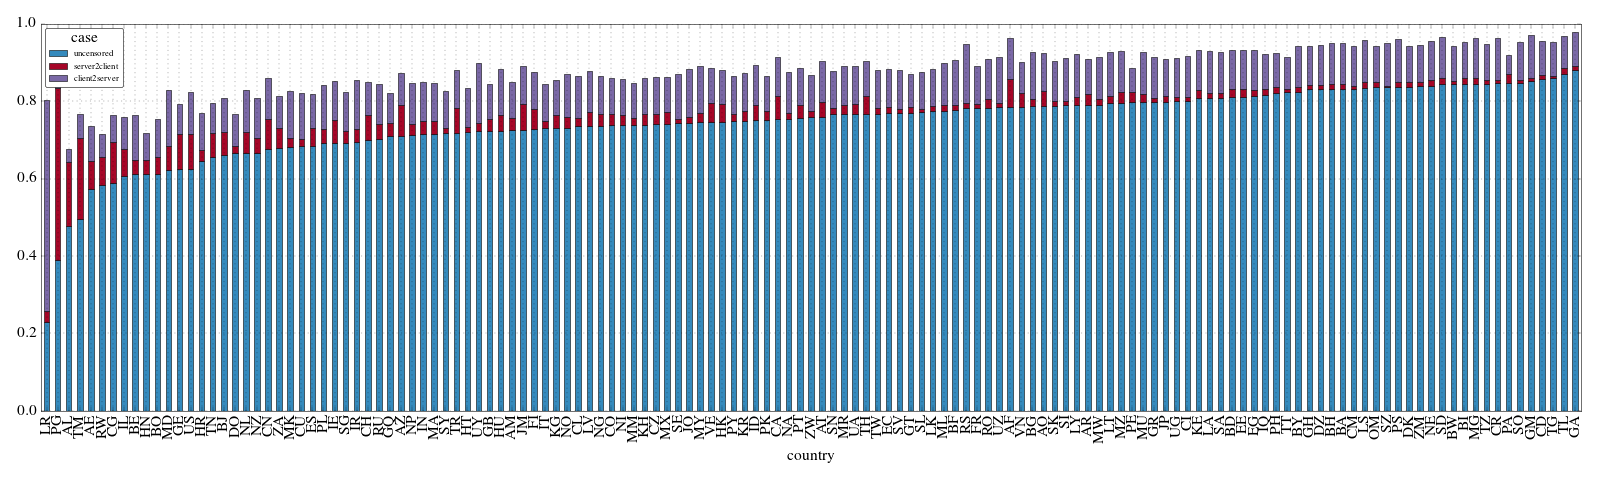

In [28]:
fig1, ax1 = plt.subplots(1,1, figsize=(20,6))
#df = df_censorship[['case2', 'case1', 'case3', 'case04']].rename(columns = {'case2':'uncensored',
#                                                                  'case1':'server2client',
#                                                                  'case3':'client2server',
#                                                                   'case04': 'unknown'})
df = df_censorship[['case2', 'case1', 'case3']].rename(columns = {'case2':'uncensored',
                                                                  'case1':'server2client',
                                                                  'case3':'client2server'})
df.plot(kind='bar', stacked=True, ax=ax1)
fig1.tight_layout()
fig1.savefig(RESULTS + "cases_ratio_by_country_stacked_bar")

## GLOBAL: BY SUBCAT - IGNORE COUNTRY

In [30]:
df_censorship = df_case_count.reset_index().groupby('subcat').sum()
df_censorship = df_censorship.rename( columns= {k:str(k) for k in df_censorship.columns} )
df_censorship['total_err'] = df_censorship[['0','4']].sum(axis=1)
#df_censorship['total'] = df_censorship['total'] - df_censorship['total_err']
df_censorship = df_censorship[['1','3','2','total', 'total_err']]

df_censorship['case1'] = df_censorship['1']/df_censorship['total'] 
df_censorship['case3'] = df_censorship['3']/df_censorship['total'] 
df_censorship['case2'] = df_censorship['2']/df_censorship['total'] 
df_censorship['case04'] = df_censorship['total_err']/df_censorship['total'] 

censorship_ratios = defaultdict(int)
censorship_ratio['case1'] = df_censorship['case1'].to_dict()
censorship_ratio['case2'] = df_censorship['case2'].to_dict()
censorship_ratio['case3'] = df_censorship['case3'].to_dict()
censorship_ratio['case04'] = df_censorship['case04'].to_dict()

df_censorship.to_html(RESULTS+ 'subcat_wise_censorship_total-filtered400.htm')
df_censorship.sort('case2', inplace=True)
df_censorship

case,1,3,2,total,total_err,case1,case3,case2,case04
subcat,,,,,,,,,
games,110,746,2378,3584,350,0.030692,0.208147,0.663504,0.097656
computers,71,780,2599,3861,411,0.018389,0.202020,0.673142,0.106449
vpn,16,392,1274,1853,171,0.008635,0.211549,0.687534,0.092283
health,196,475,2438,3539,430,0.055383,0.134219,0.688895,0.121503
society,93,856,3136,4546,461,0.020458,0.188297,0.689837,0.101408
news,63,144,1384,1951,360,0.032291,0.073808,0.709380,0.184521
recreation,248,223,2754,3808,583,0.065126,0.058561,0.723214,0.153099
shopping,202,57,2443,3258,556,0.062001,0.017495,0.749847,0.170657
science,77,602,3257,4318,382,0.017832,0.139416,0.754284,0.088467


<IPython.core.display.Javascript object>


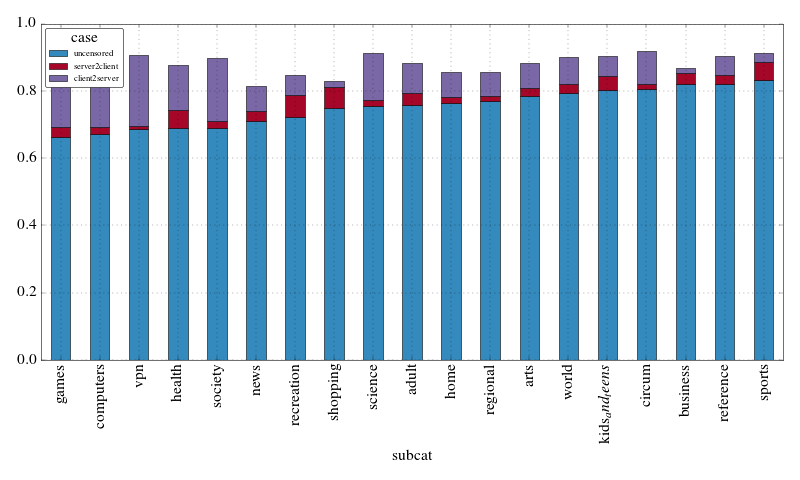

In [31]:
fig1, ax1 = plt.subplots(1,1, figsize=(10,6))
df = df_censorship[['case2', 'case1', 'case3']].rename(columns = {'case2':'uncensored',
                                                                  'case1':'server2client',
                                                                  'case3':'client2server'})
df.plot(kind='bar', stacked=True, ax=ax1)
fig1.tight_layout()
fig1.savefig(RESULTS + "cases_ratio_by_subcat_stacked_bar")

# BY SUBCAT per COUNTRY and vice versa
- draw above plots for each country
- each subplot

In [33]:
df_censorship = df_case_count.reset_index().groupby(['subcat', 'country']).sum()
df_censorship = df_censorship.rename( columns= {k:str(k) for k in df_censorship.columns} )
df_censorship['total_err'] = df_censorship[['0','4']].sum(axis=1)
#df_censorship['total'] = df_censorship['total'] - df_censorship['total_err']
df_censorship = df_censorship[['1','3','2','total_err','total']]
df_censorship['case1'] = df_censorship['1']/df_censorship['total'] 
df_censorship['case3'] = df_censorship['3']/df_censorship['total'] 
df_censorship['case2'] = df_censorship['2']/df_censorship['total'] 
df_censorship['case04'] = df_censorship['total_err']/df_censorship['total']

In [40]:
df_censorship = df_censorship.reset_index()

<IPython.core.display.Javascript object>


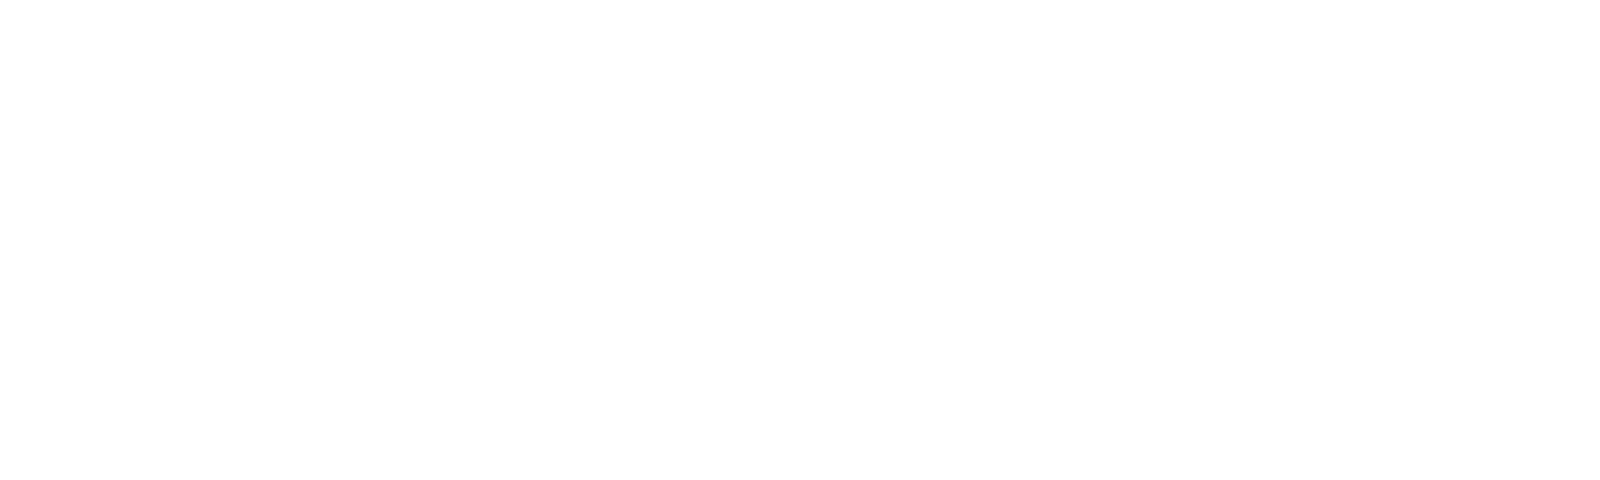

<IPython.core.display.Javascript object>


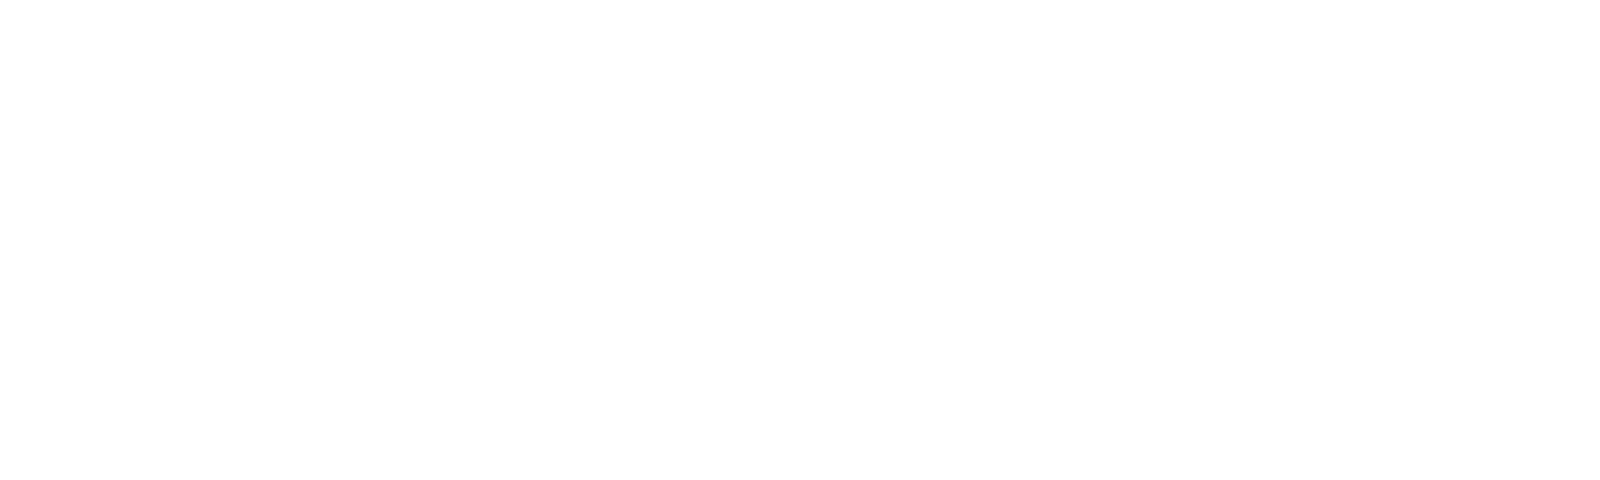

<IPython.core.display.Javascript object>


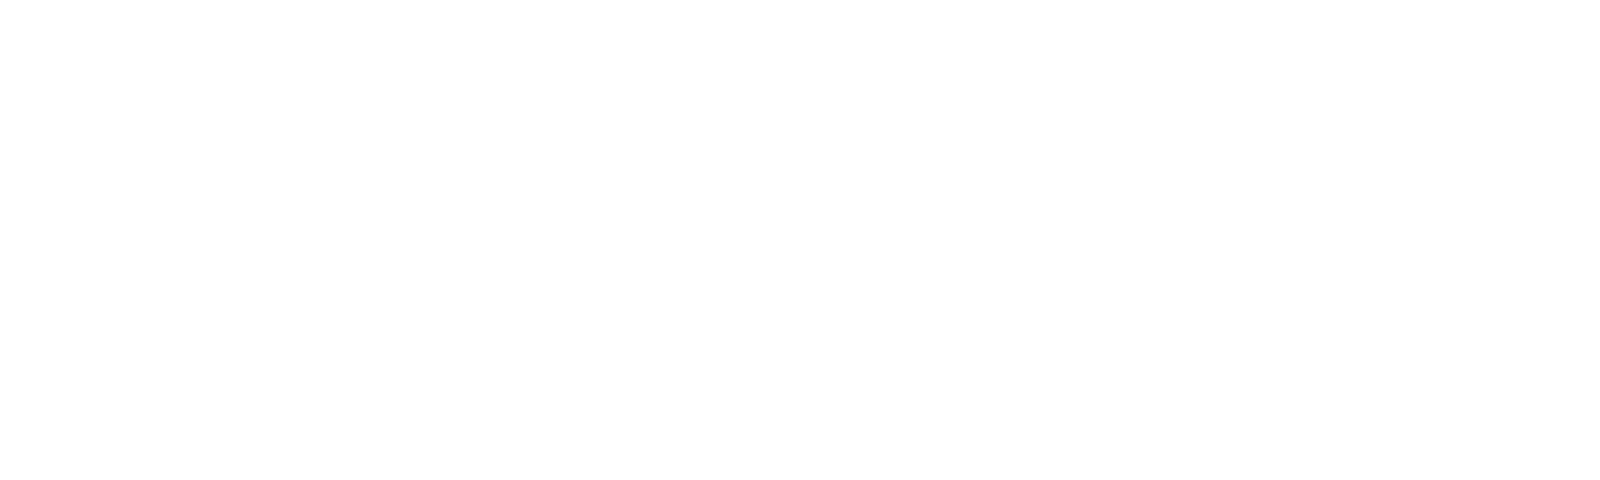

<IPython.core.display.Javascript object>


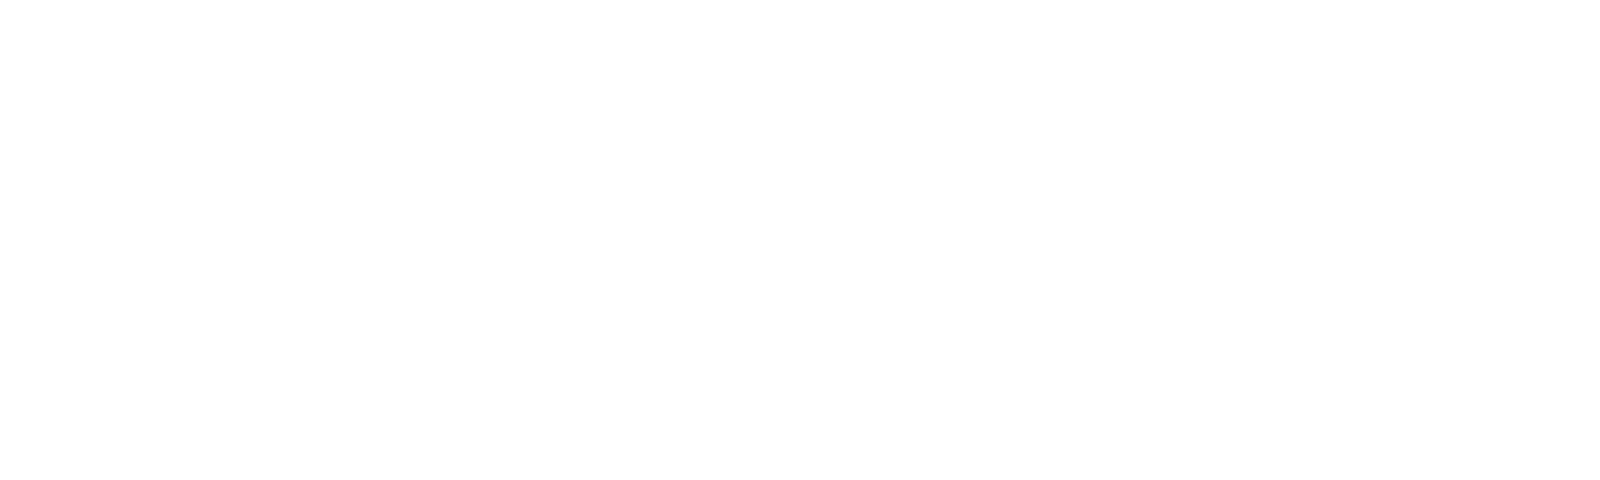

<IPython.core.display.Javascript object>


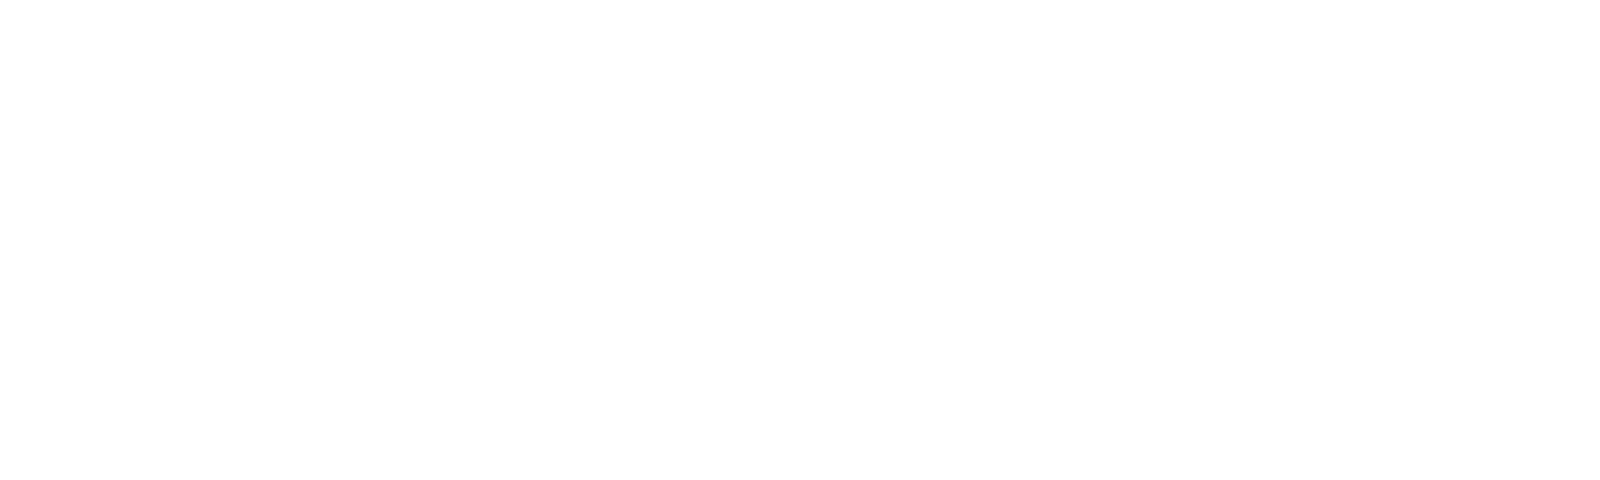

<IPython.core.display.Javascript object>


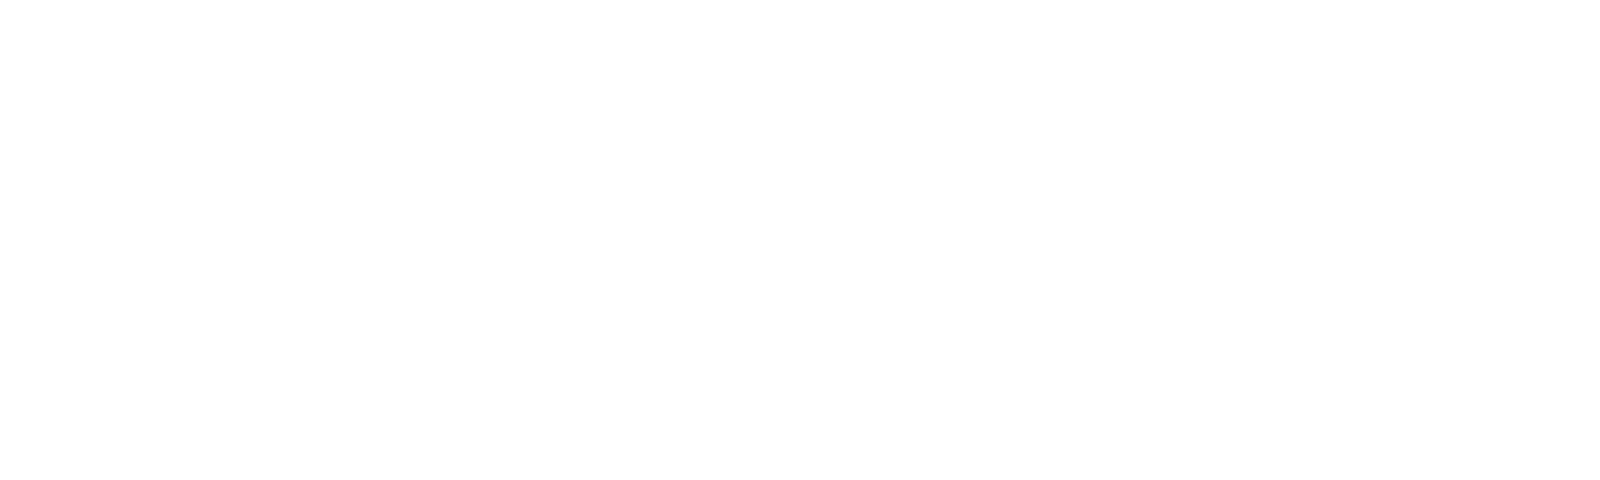

<IPython.core.display.Javascript object>


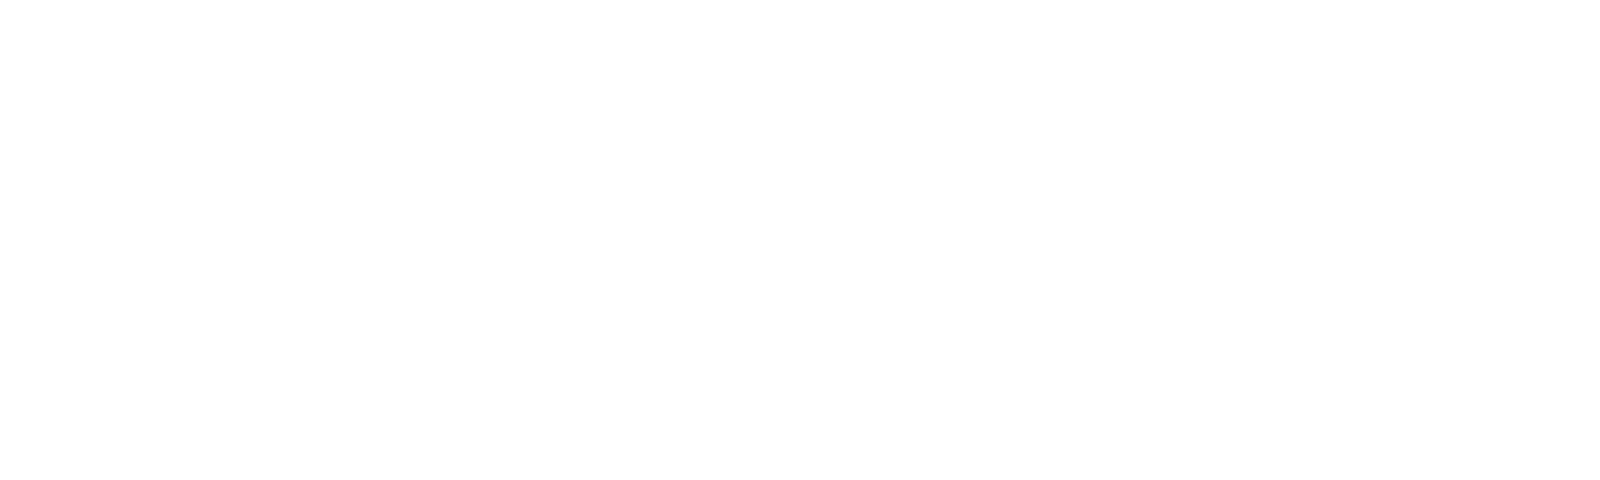

<IPython.core.display.Javascript object>


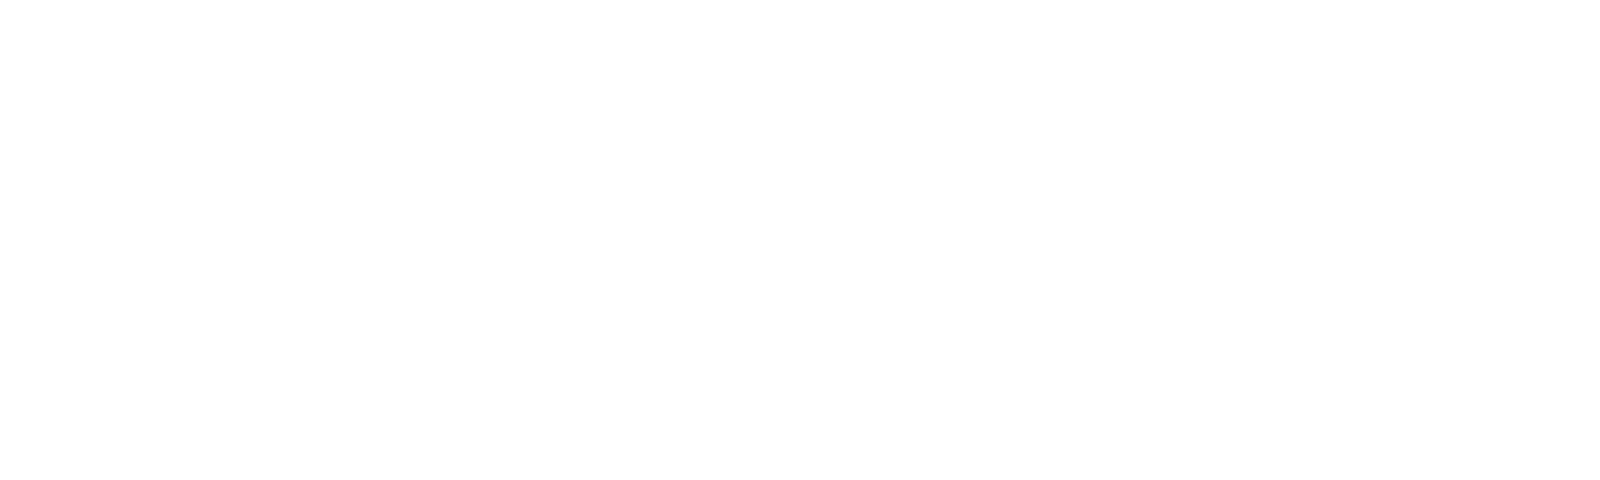

<IPython.core.display.Javascript object>


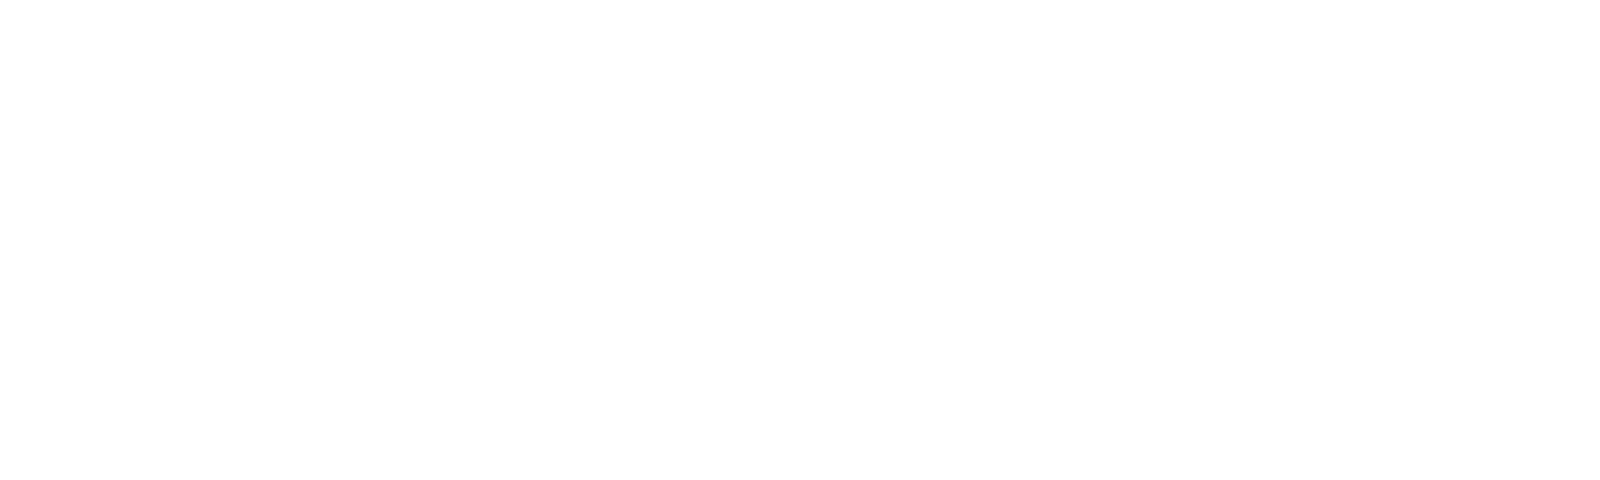

<IPython.core.display.Javascript object>


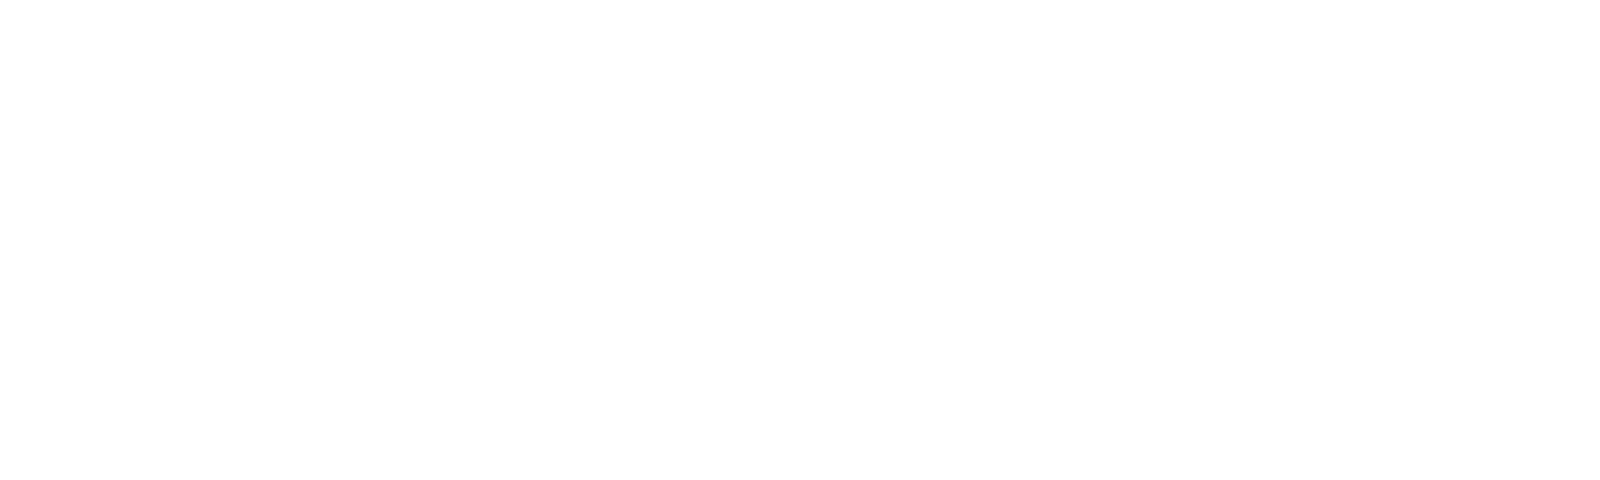

<IPython.core.display.Javascript object>


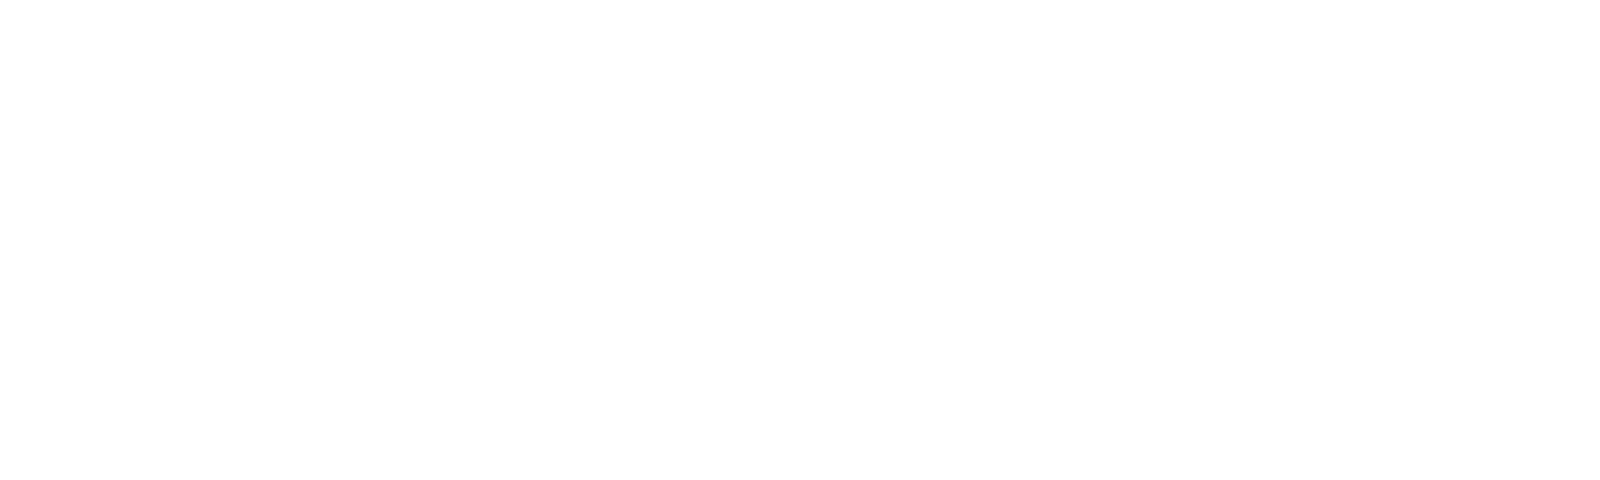

<IPython.core.display.Javascript object>


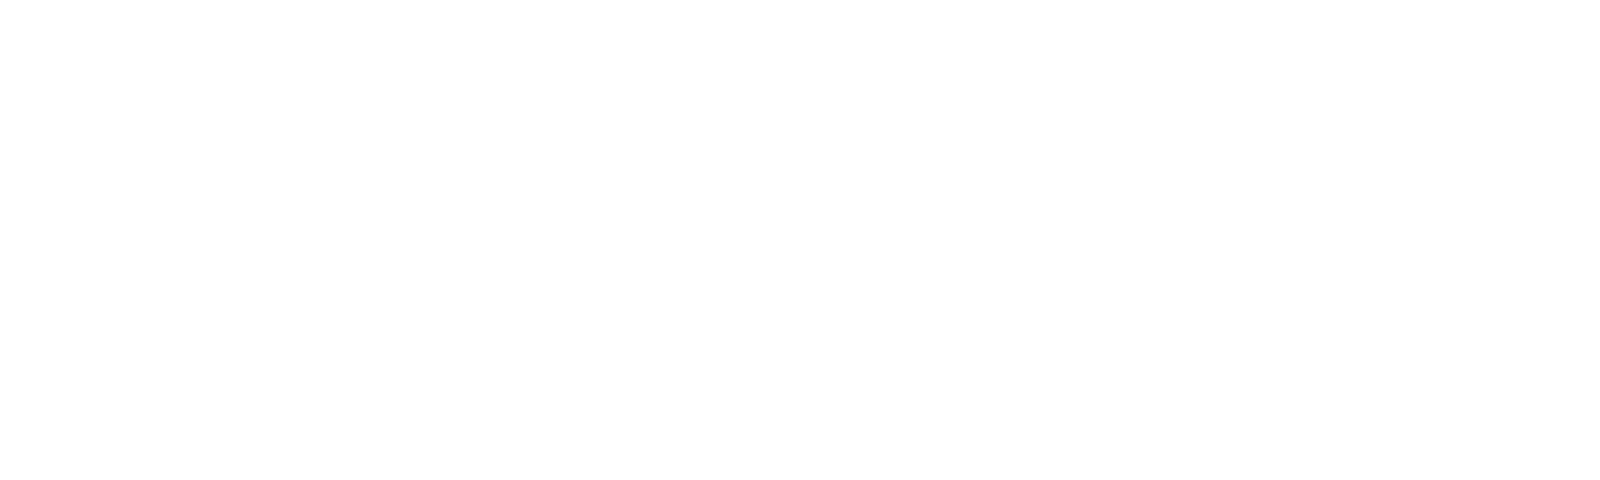

<IPython.core.display.Javascript object>


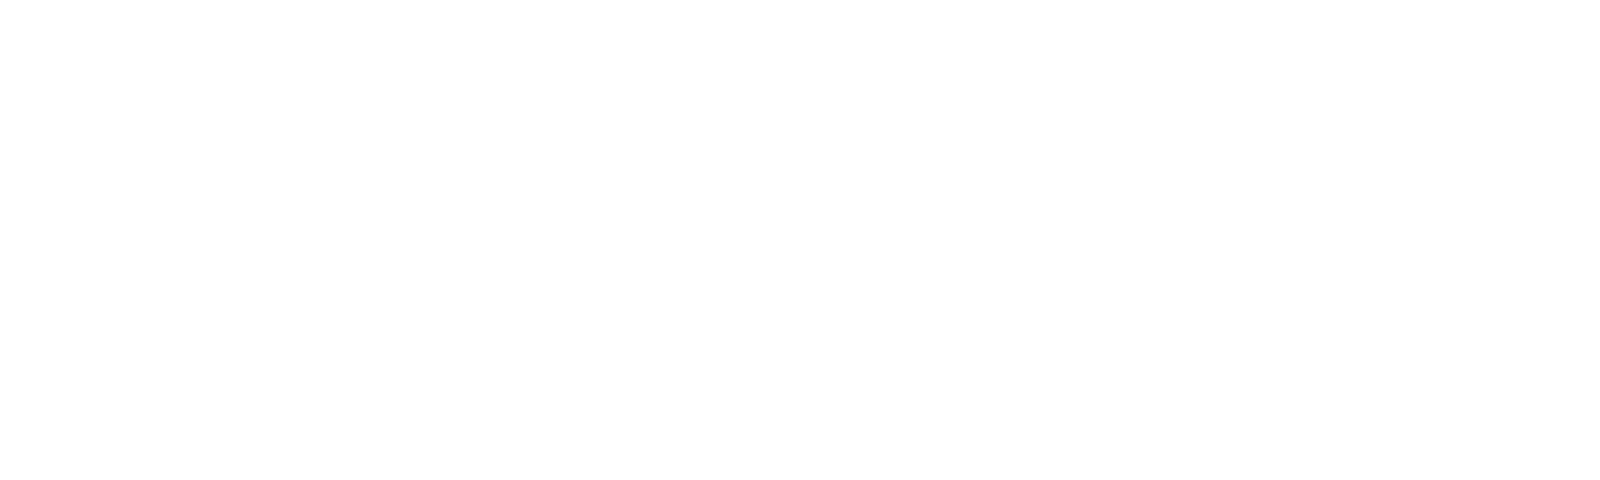

<IPython.core.display.Javascript object>


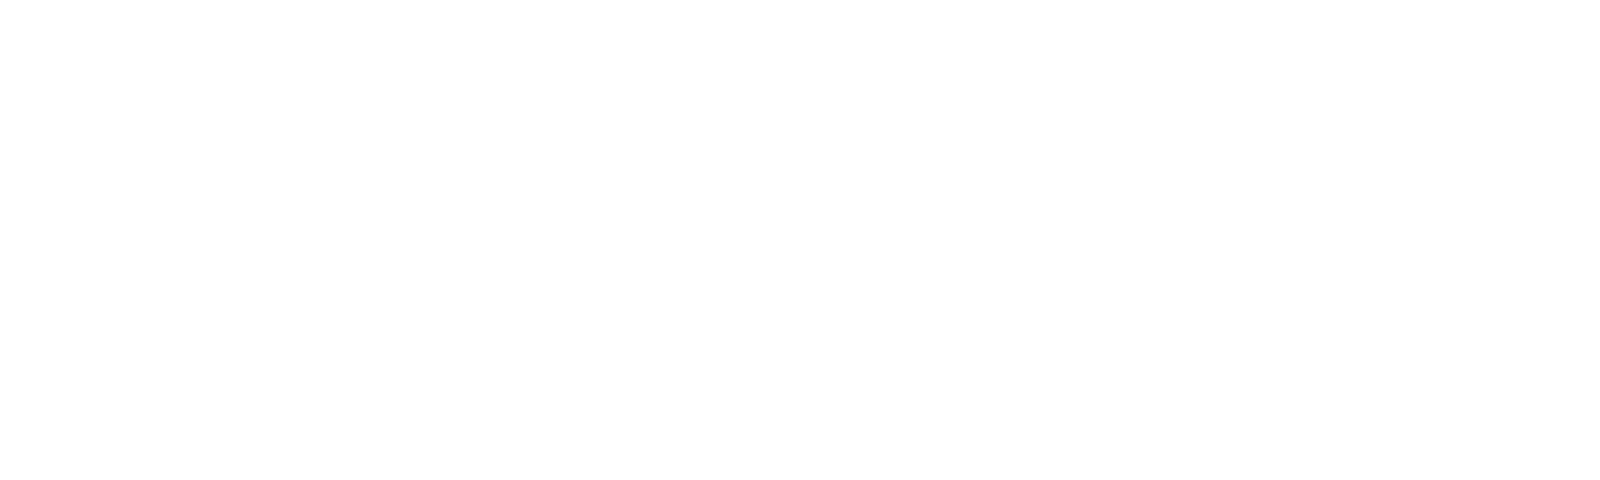

<IPython.core.display.Javascript object>


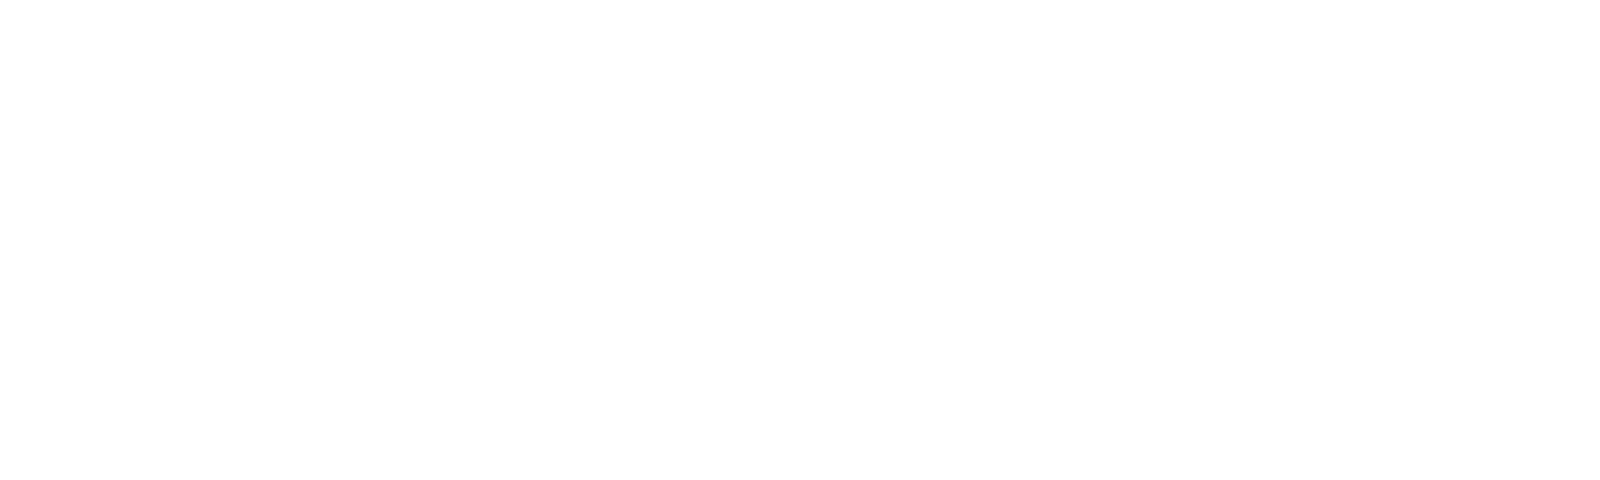

<IPython.core.display.Javascript object>


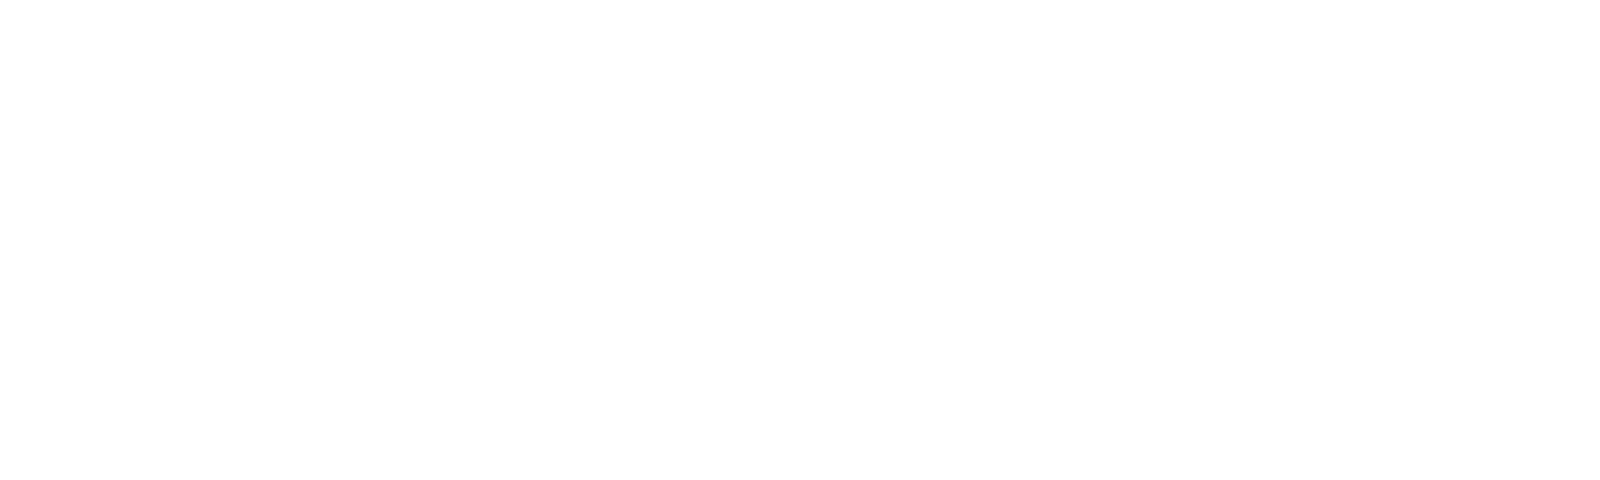

<IPython.core.display.Javascript object>


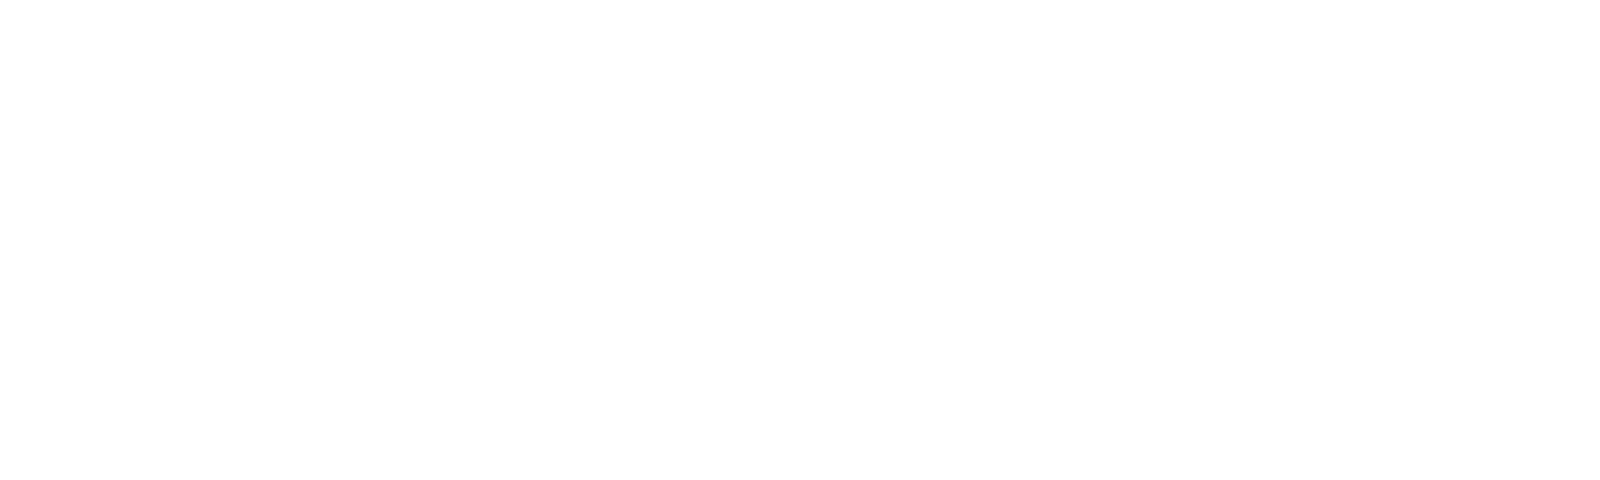

<IPython.core.display.Javascript object>


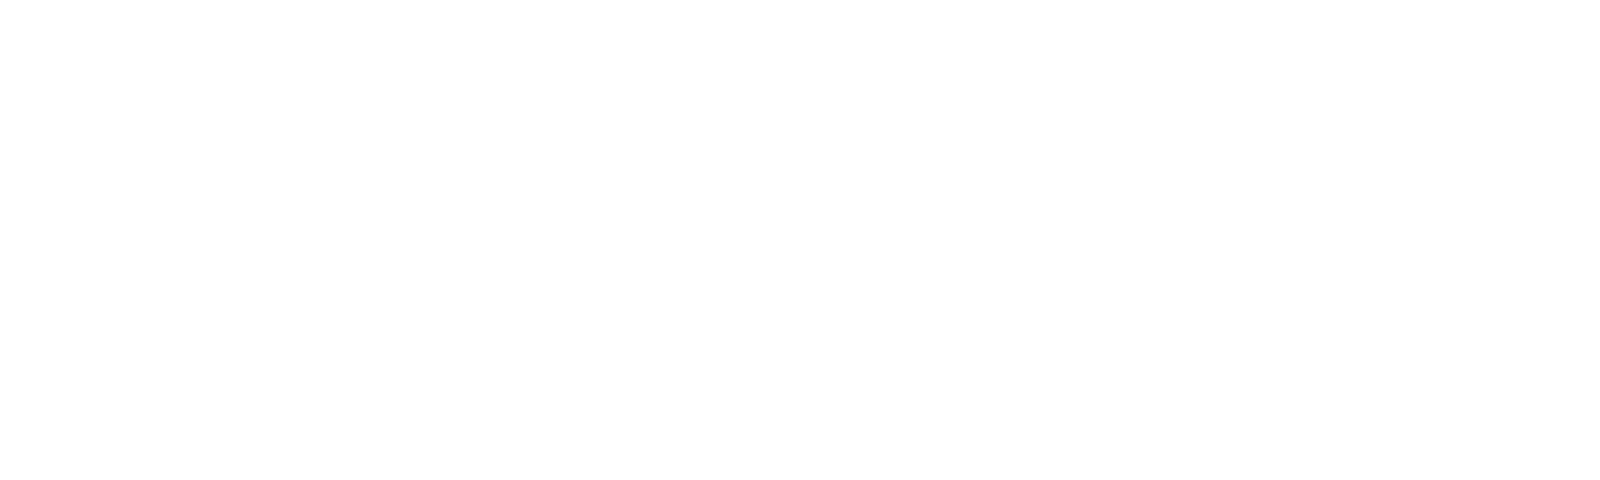

<IPython.core.display.Javascript object>


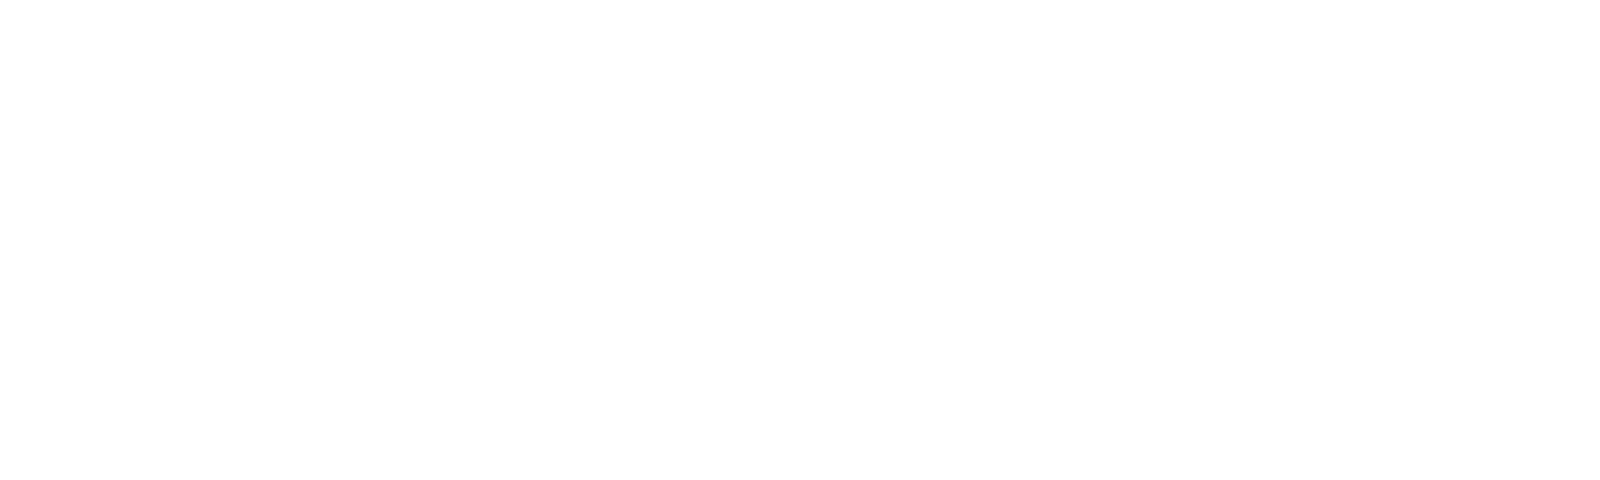

In [42]:
currFolder = RESULTS + "subcat/"
if not os.path.exists(currFolder):
    os.makedirs(currFolder)

for subcat in df_censorship.subcat.unique():
    
    df_per_subcat = df_censorship[ df_censorship['subcat']==subcat ].sort('case2')
    
    #fig1, ax1 = plt.subplits(1, 1, figsize=(10,7))
    fig1, ax1 = plt.subplots(1,1, figsize=(20,6))
    df = df_per_subcat.set_index('country')[['case2', 'case1','case3']].rename(columns = {'case2':'uncensored',
                                                                  'case1':'server2client',
                                                                  'case3':'client2server'})
    df.plot(kind='bar', stacked=True, ax=ax1)
    fig1.tight_layout()
    fig1.savefig(currFolder + "cases_ratio_by_country_stacked_bar_"+subcat)
    plt.close()

# PCA

In [95]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d

In [96]:
tsne = TSNE(n_components=2, random_state=0)
pca = PCA(n_components=2)

In [102]:
df_censorship.subcat.unique()

array(['adult', 'arts', 'business', 'circum', 'computers', 'games',
       'health', 'home', 'kids_and_teens', 'news', 'recreation',
       'reference', 'regional', 'science', 'shopping', 'society', 'sports',
       'vpn', 'world'], dtype=object)

In [113]:
df_filtered = df_censorship[['subcat','country','case1','case2','case3']]
#df_filtered = df_filtered[df_filtered['subcat'].isin(['circum', 'vpn', 'adult', 'society','games'])]

In [106]:
df_multidim = df_filtered.pivot(index='country', columns='subcat')

In [107]:
mat = df_multidim.as_matrix()

In [111]:
df4 = pd.DataFrame(tsne.fit_transform(mat)).set_index(df_multidim.index)
#df4 = pd.DataFrame(pca.fit_transform(mat)).set_index(case.index)

<IPython.core.display.Javascript object>


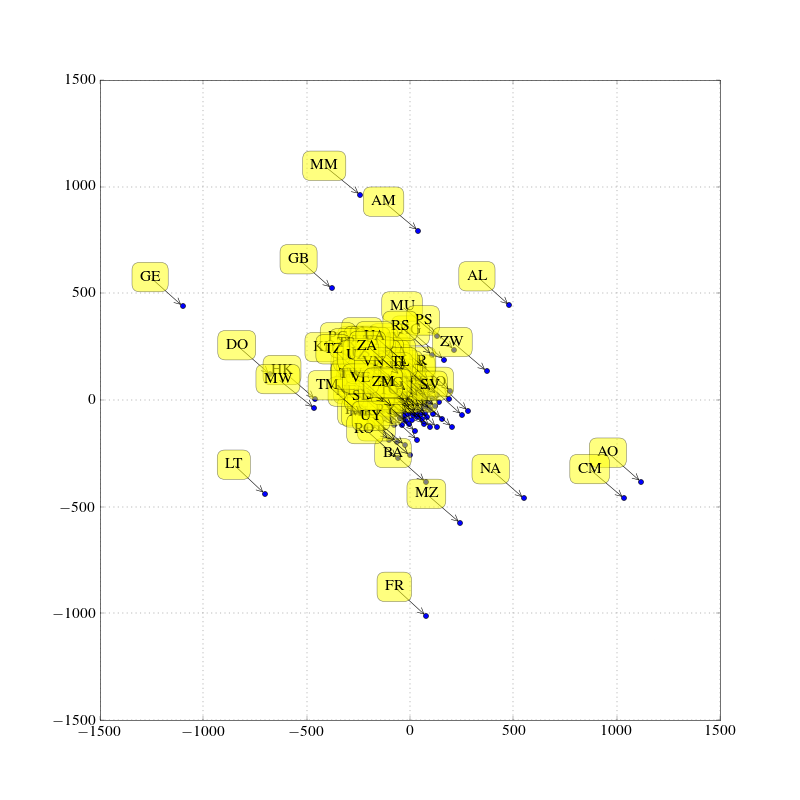

In [112]:
fig2, ax2 = plt.subplots(1,1, figsize=(10,10))
ax2.scatter(df4[0], df4[1])
for label, x, y in zip(df4.index, df4[0], df4[1]):
    ax2.annotate(
        label, 
        xy = (x, y), xytext = (-20, 20),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))
ax2.grid(1)
fig2.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


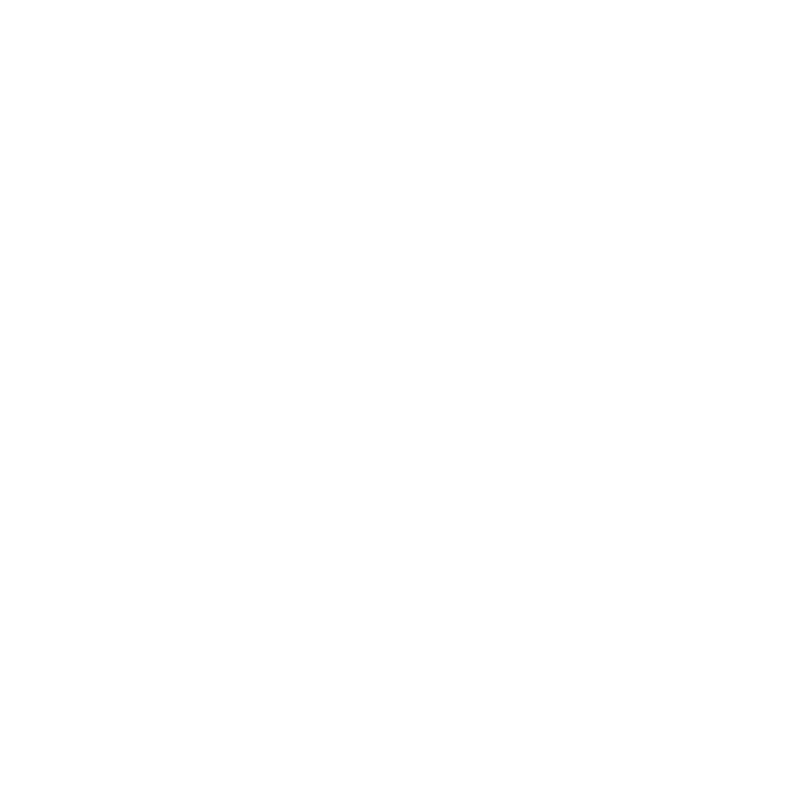

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


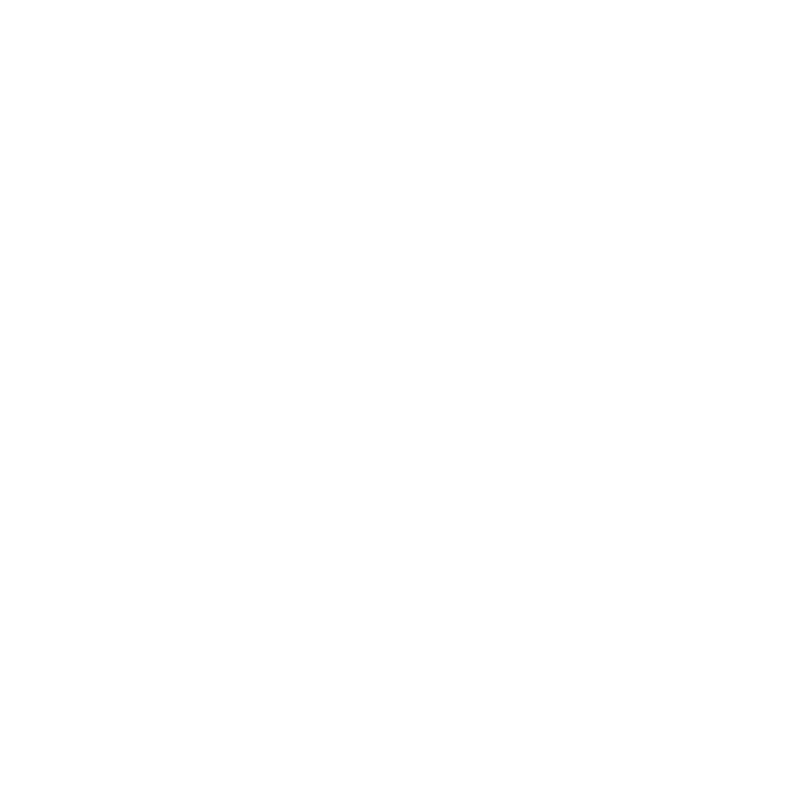

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


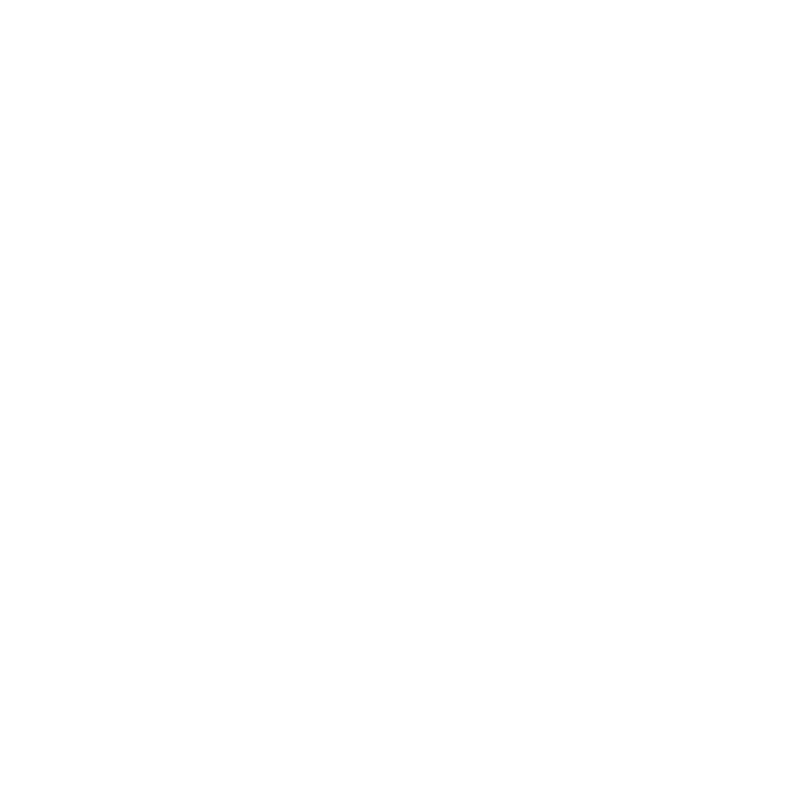

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


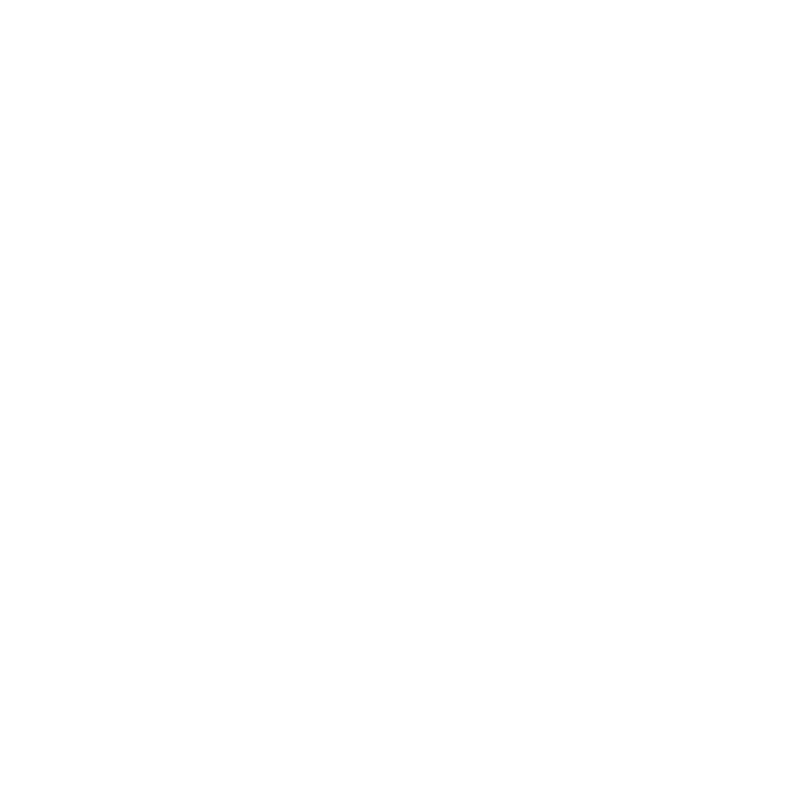

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


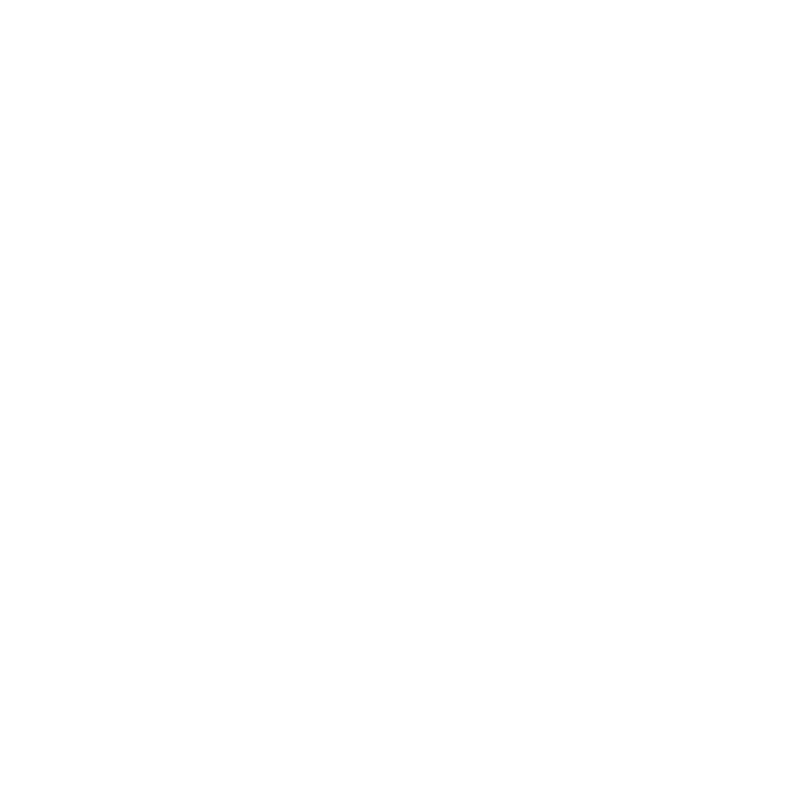

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


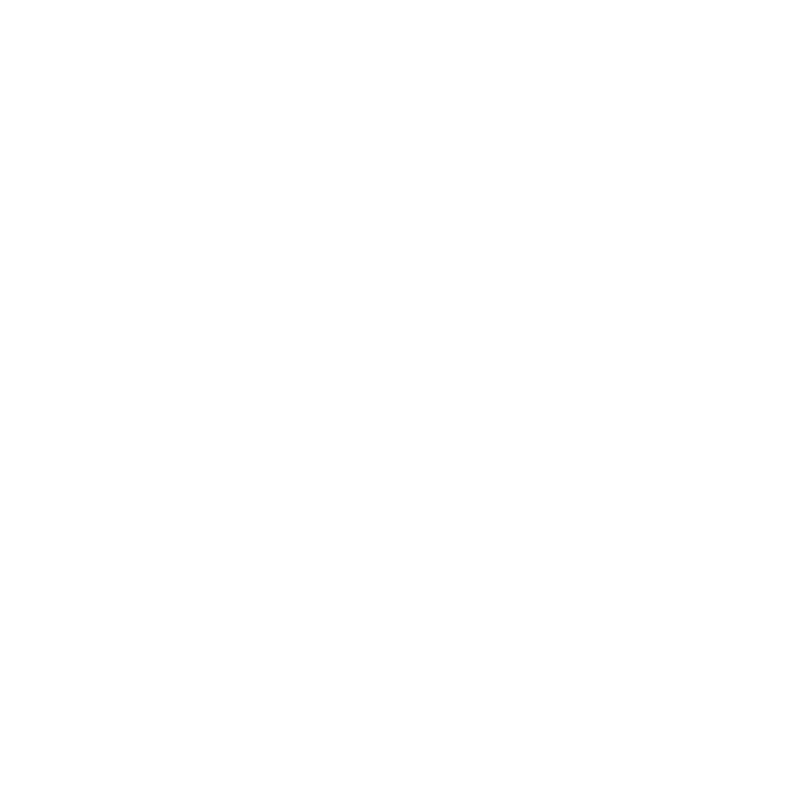

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


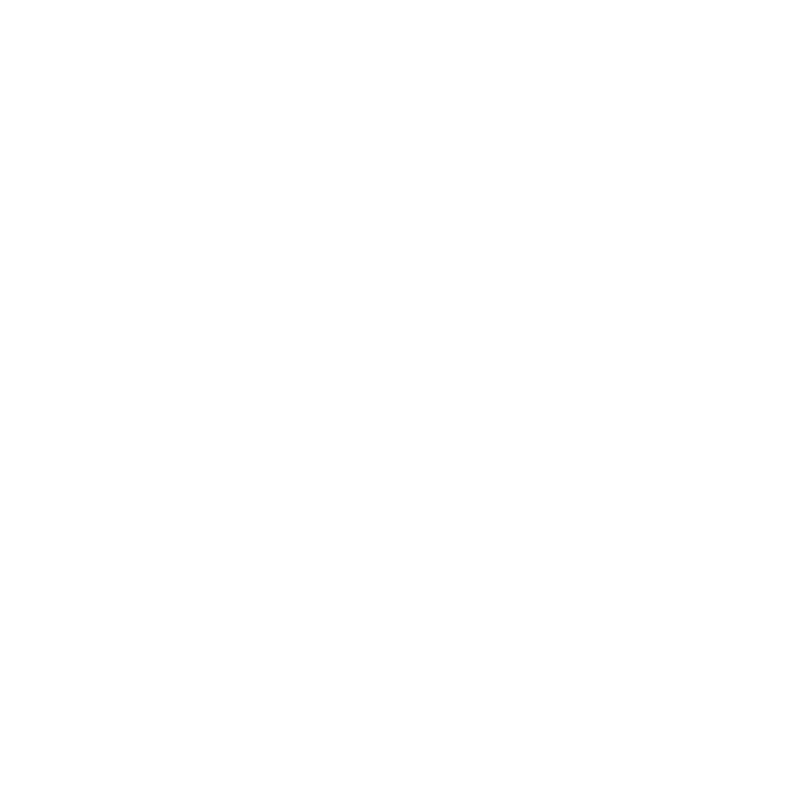

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


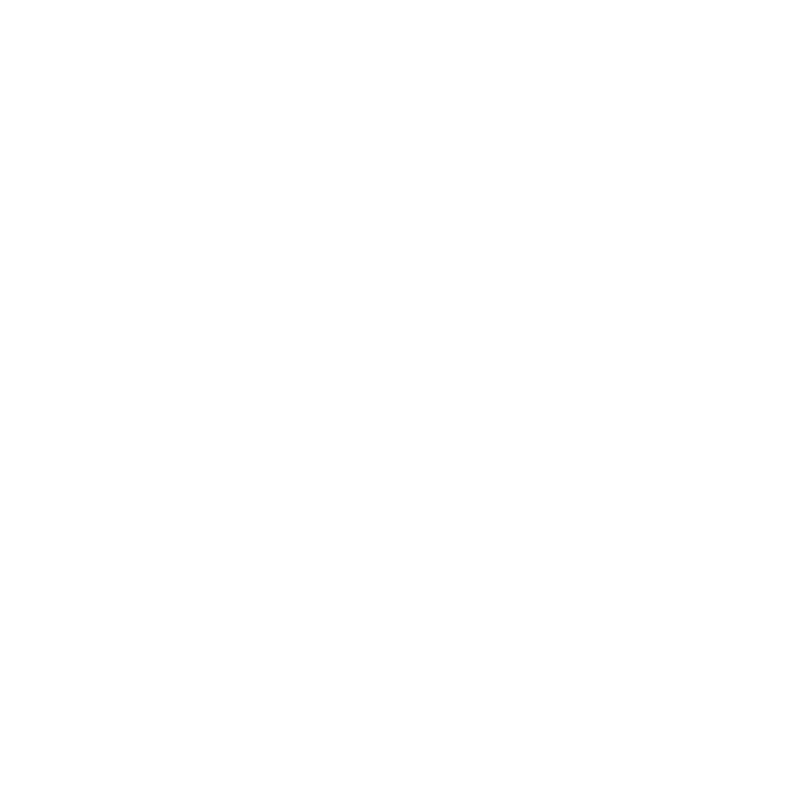

<IPython.core.display.Javascript object>

RuntimeError: LaTeX was not able to process the following string:
'pca kids_and_teens case: 1,2,3'
Here is the full report generated by LaTeX: 

This is pdfTeX, Version 3.1415926-2.5-1.40.14 (TeX Live 2013/Debian)
 restricted \write18 enabled.
entering extended mode
(./ff34b89262d8233a9b8b96a690acd80a.tex
LaTeX2e <2011/06/27>
Babel <3.9h> and hyphenation patterns for 78 languages loaded.
(/usr/share/texlive/texmf-dist/tex/latex/base/article.cls
Document Class: article 2007/10/19 v1.4h Standard LaTeX document class
(/usr/share/texlive/texmf-dist/tex/latex/base/size10.clo))
(/usr/share/texlive/texmf-dist/tex/latex/type1cm/type1cm.sty)
(/usr/share/texlive/texmf-dist/tex/latex/psnfss/mathptmx.sty)
(/usr/share/texlive/texmf-dist/tex/latex/psnfss/courier.sty)
(/usr/share/texlive/texmf-dist/tex/latex/base/textcomp.sty
(/usr/share/texlive/texmf-dist/tex/latex/base/ts1enc.def))
(/usr/share/texlive/texmf-dist/tex/latex/geometry/geometry.sty
(/usr/share/texlive/texmf-dist/tex/latex/graphics/keyval.sty)
(/usr/share/texlive/texmf-dist/tex/generic/oberdiek/ifpdf.sty)
(/usr/share/texlive/texmf-dist/tex/generic/oberdiek/ifvtex.sty)
(/usr/share/texlive/texmf-dist/tex/generic/ifxetex/ifxetex.sty)

Package geometry Warning: Over-specification in `h'-direction.
    `width' (5058.9pt) is ignored.


Package geometry Warning: Over-specification in `v'-direction.
    `height' (5058.9pt) is ignored.

)
No file ff34b89262d8233a9b8b96a690acd80a.aux.
(/usr/share/texlive/texmf-dist/tex/latex/base/ts1cmr.fd)
(/usr/share/texlive/texmf-dist/tex/latex/psnfss/ot1ptm.fd)
*geometry* driver: auto-detecting
*geometry* detected driver: dvips
! Missing $ inserted.
<inserted text> 
                $
l.12 ...{16.800000}{21.000000}{\rmfamily pca kids_
                                                  and_teens case: 1,2,3}
(/usr/share/texlive/texmf-dist/tex/latex/psnfss/ot1ztmcm.fd)
(/usr/share/texlive/texmf-dist/tex/latex/psnfss/omlztmcm.fd)
(/usr/share/texlive/texmf-dist/tex/latex/psnfss/omsztmcm.fd)
(/usr/share/texlive/texmf-dist/tex/latex/psnfss/omxztmcm.fd)
! Extra }, or forgotten $.
l.12 ...{\rmfamily pca kids_and_teens case: 1,2,3}
                                                  
! Missing $ inserted.
<inserted text> 
                $
l.13 \end{document}
                   
[1] (./ff34b89262d8233a9b8b96a690acd80a.aux) )
(\end occurred inside a group at level 1)

### simple group (level 1) entered at line 12 ({)
### bottom level
(see the transcript file for additional information)
Output written on ff34b89262d8233a9b8b96a690acd80a.dvi (1 page, 452 bytes).
Transcript written on ff34b89262d8233a9b8b96a690acd80a.log.


In [121]:
#subcat = 'adult'

for subcat in df_censorship.subcat.unique():
    df = df_filtered[df_filtered['subcat']==subcat].set_index('country')[['case1','case2','case3']]
    mat = df.as_matrix()
    df4 = pd.DataFrame(pca.fit_transform(mat)).set_index(df.index)

    model = 'pca'
    fig2, ax2 = plt.subplots(1,1, figsize=(10,10))
    ax2.scatter(df4[0], df4[1])
    for label, x, y in zip(df4.index, df4[0], df4[1]):
        ax2.annotate(
            label, 
            xy = (x, y), xytext = (-20, 20),
            textcoords = 'offset points', ha = 'right', va = 'bottom',
            bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
            arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))
    ax2.set_title(model + ' ' + subcat + ' case: 1,2,3')
    ax2.grid(1)
    fig2.savefig(RESULTS + "subcat/" + model + '-' + subcat)

    model = 'tsne'
    fig2, ax2 = plt.subplots(1,1, figsize=(10,10))
    ax2.scatter(df4[0], df4[1])
    for label, x, y in zip(df4.index, df4[0], df4[1]):
        ax2.annotate(
            label, 
            xy = (x, y), xytext = (-20, 20),
            textcoords = 'offset points', ha = 'right', va = 'bottom',
            bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
            arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))
    ax2.set_title(model + ' ' + subcat + ' case: 1,2,3')
    ax2.grid(1)
    fig2.savefig(RESULTS + "subcat/" + model + '-' + subcat)

    plt.close()
#df_multidim = df.pivot(index='country', columns='subcat')

In [136]:
df_global = df_censorship.groupby('subcat')[['1','2','3', 'total']].sum()
df_global['1'] = df_global['1']/df_global['total']
df_global['2'] = df_global['2']/df_global['total']
df_global['3'] = df_global['3']/df_global['total']
df_global = df_global[['1','2','3']]


<IPython.core.display.Javascript object>


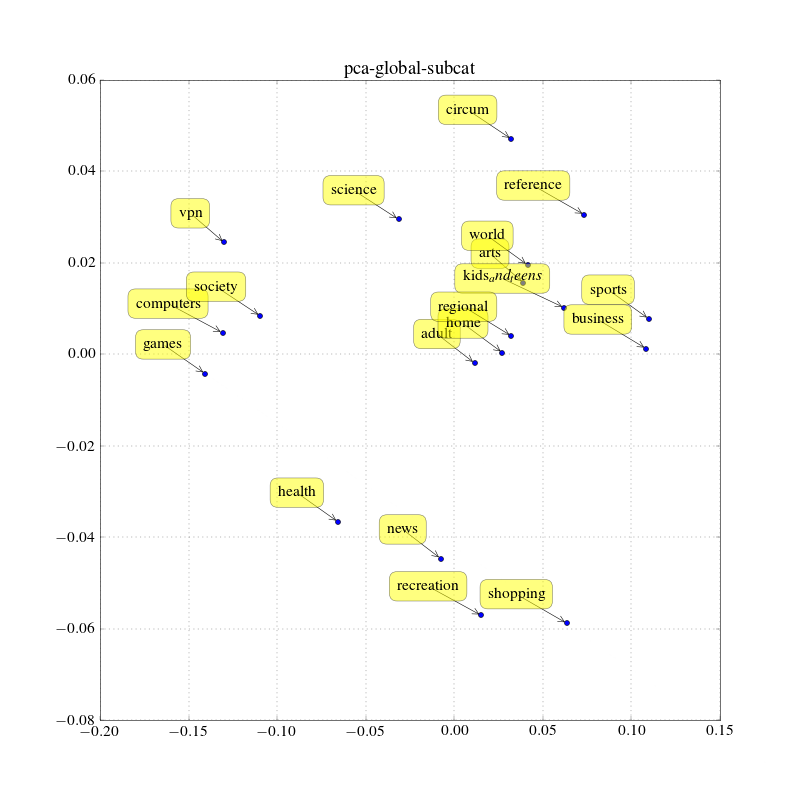

<IPython.core.display.Javascript object>


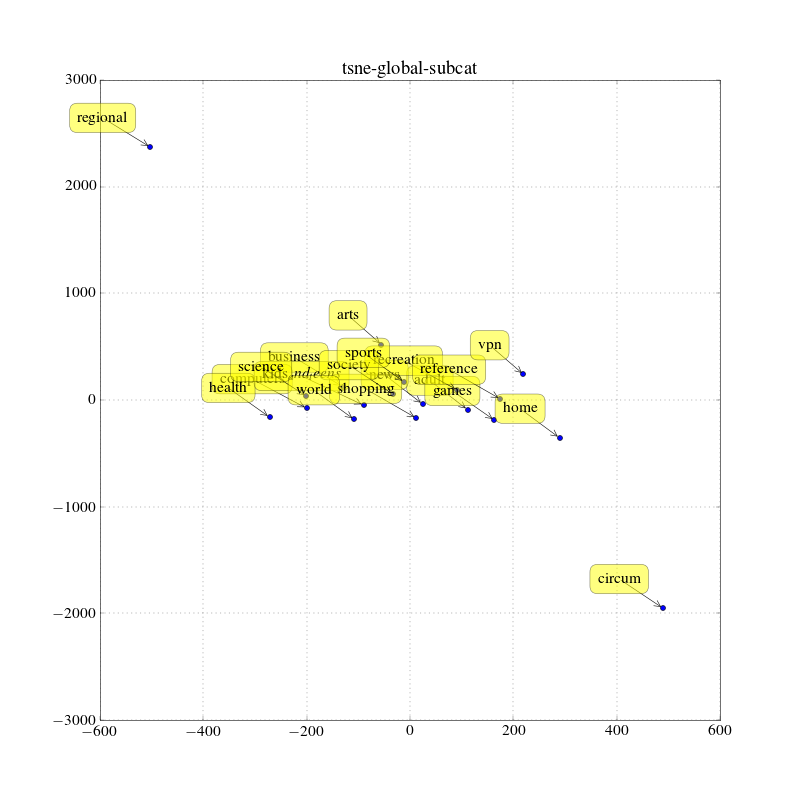

In [137]:

mat = df_global.as_matrix()

model = 'pca'
df4 = pd.DataFrame(pca.fit_transform(mat)).set_index(df_global.index)
fig2, ax2 = plt.subplots(1,1, figsize=(10,10))
ax2.scatter(df4[0], df4[1])
for label, x, y in zip(df4.index, df4[0], df4[1]):
    ax2.annotate(
        label, 
        xy = (x, y), xytext = (-20, 20),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))
ax2.grid(1)
ax2.set_title(model + '-global-subcat')
fig2.savefig(RESULTS + model + '-global-subcat')

model = 'tsne'
df4 = pd.DataFrame(tsne.fit_transform(mat)).set_index(df_global.index)
fig2, ax2 = plt.subplots(1,1, figsize=(10,10))
ax2.scatter(df4[0], df4[1])
for label, x, y in zip(df4.index, df4[0], df4[1]):
    ax2.annotate(
        label, 
        xy = (x, y), xytext = (-20, 20),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))
ax2.grid(1)
ax2.set_title(model + '-global-subcat')
fig2.savefig(RESULTS + model + '-global-subcat')

<IPython.core.display.Javascript object>


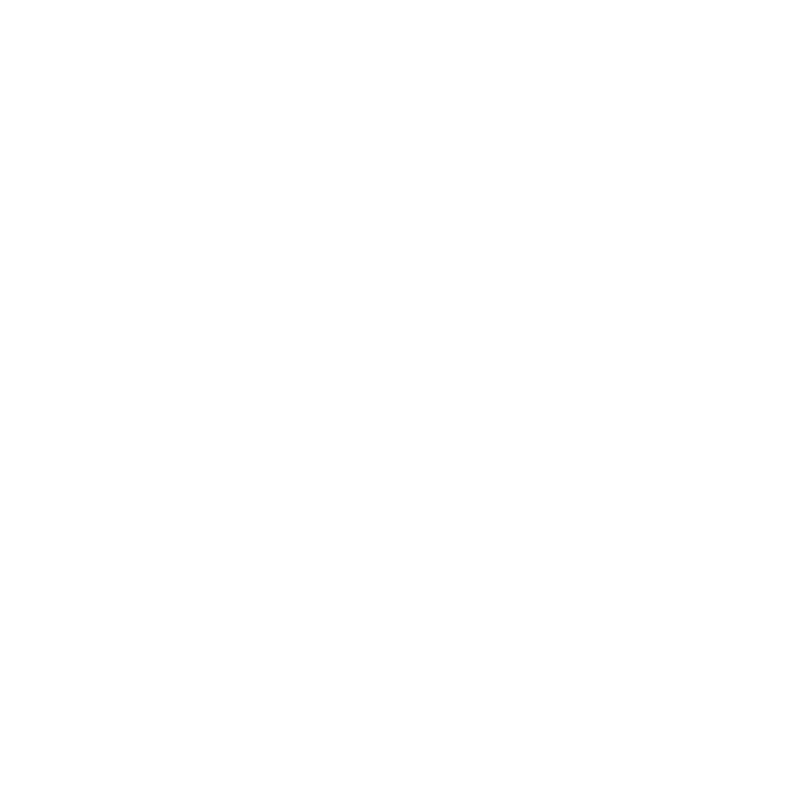

<IPython.core.display.Javascript object>


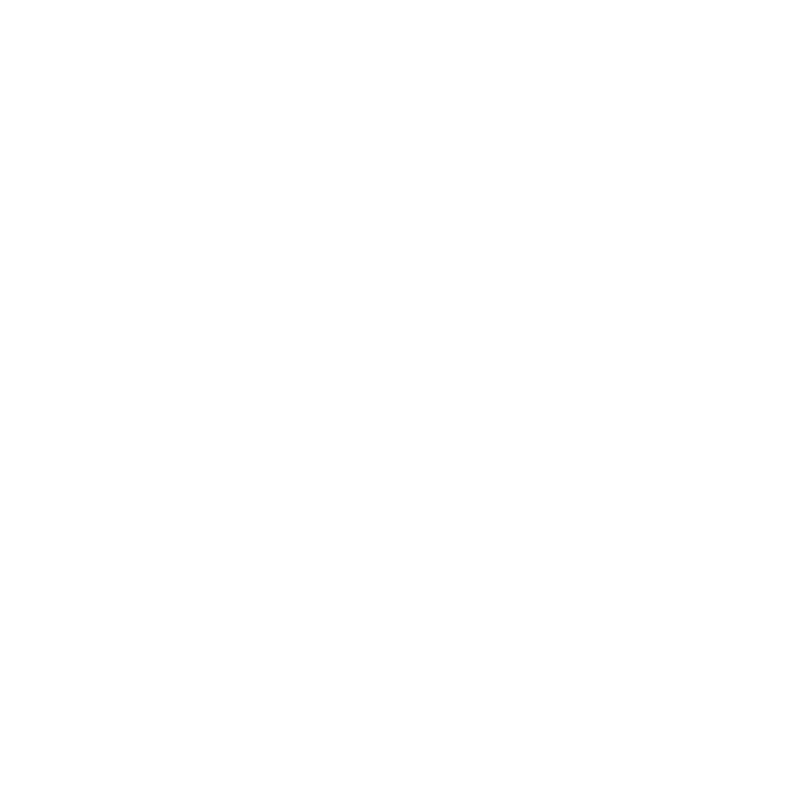

<IPython.core.display.Javascript object>


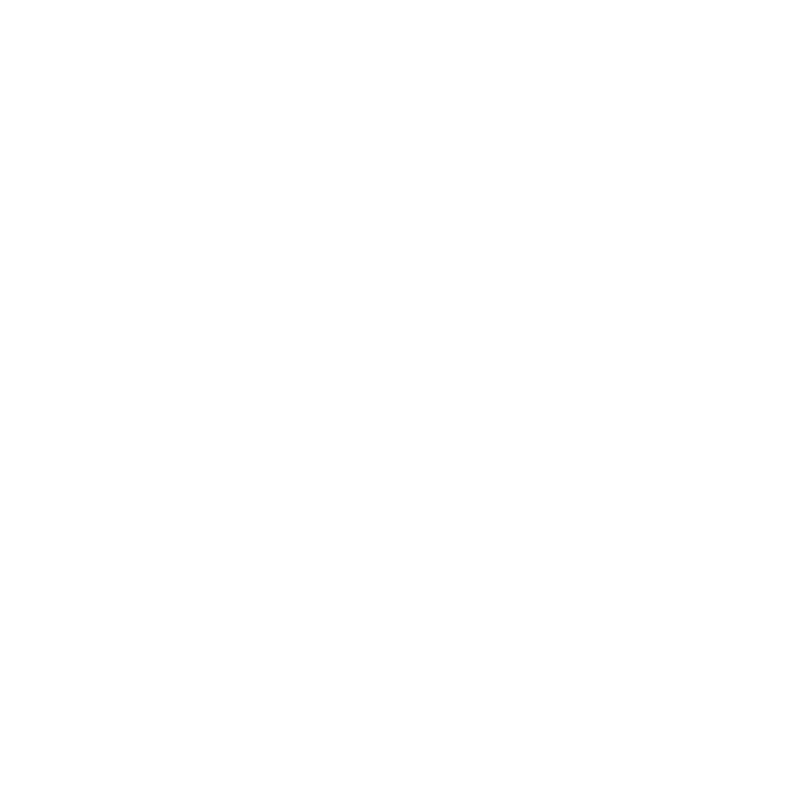

<IPython.core.display.Javascript object>


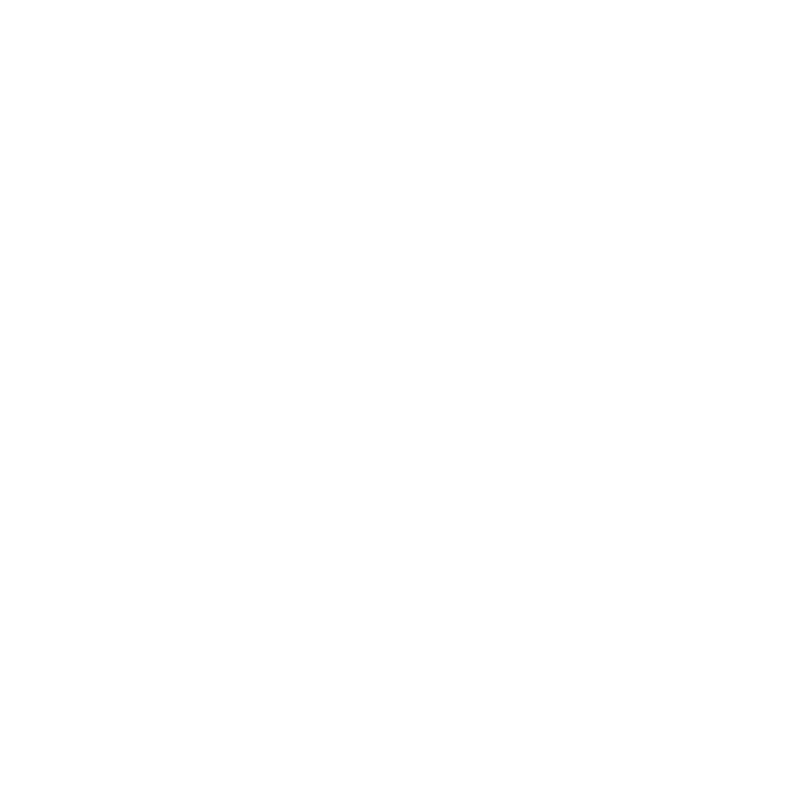

<IPython.core.display.Javascript object>


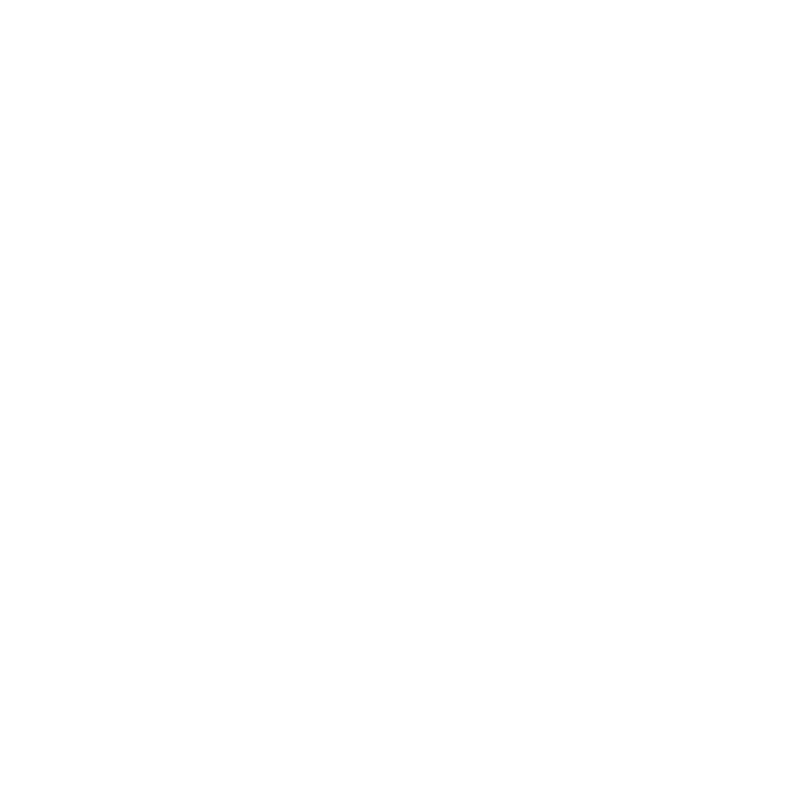

<IPython.core.display.Javascript object>


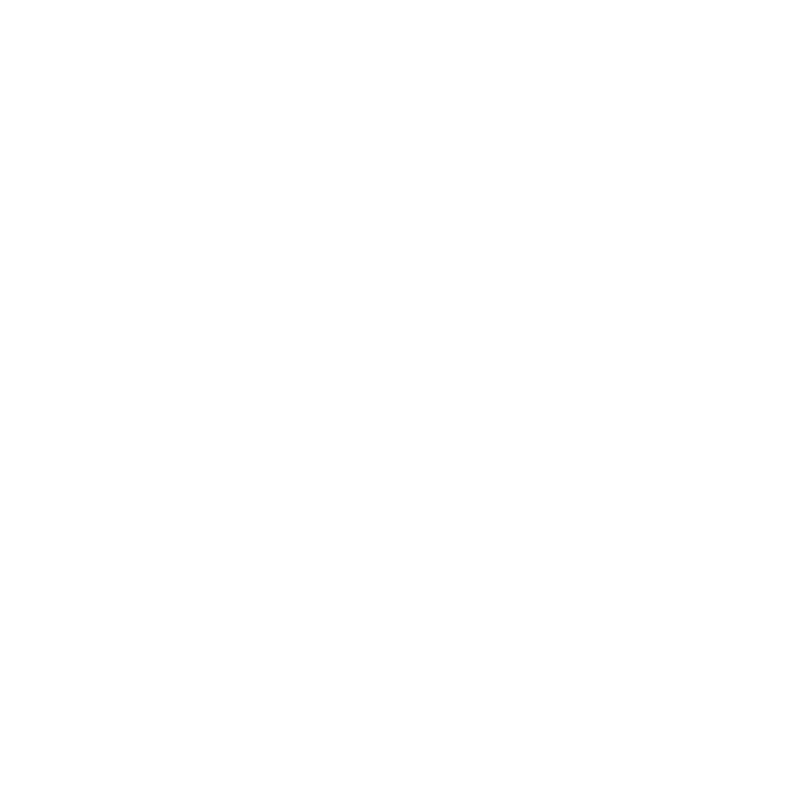

<IPython.core.display.Javascript object>


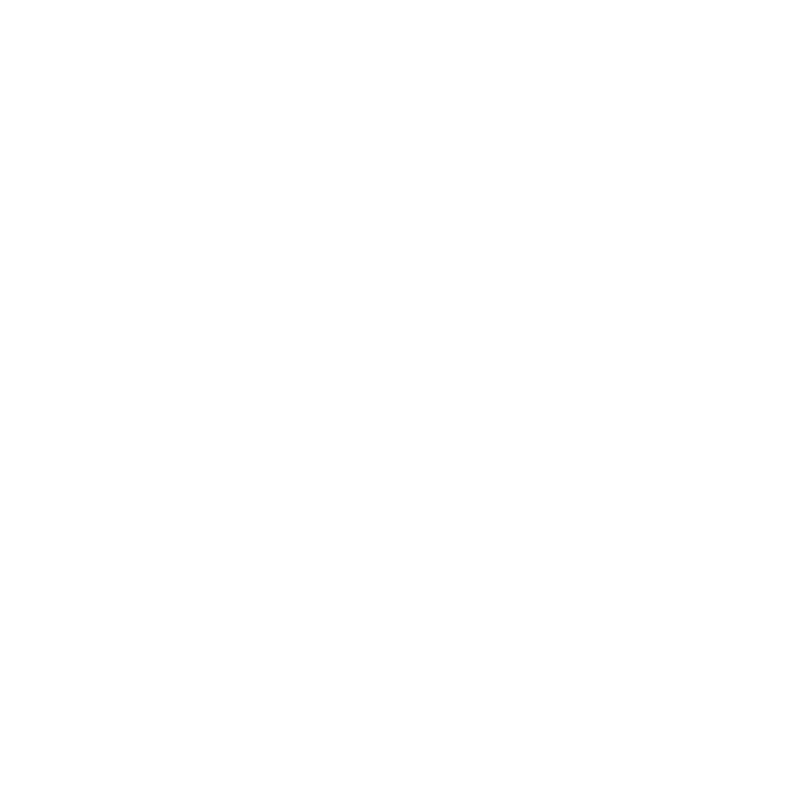

<IPython.core.display.Javascript object>


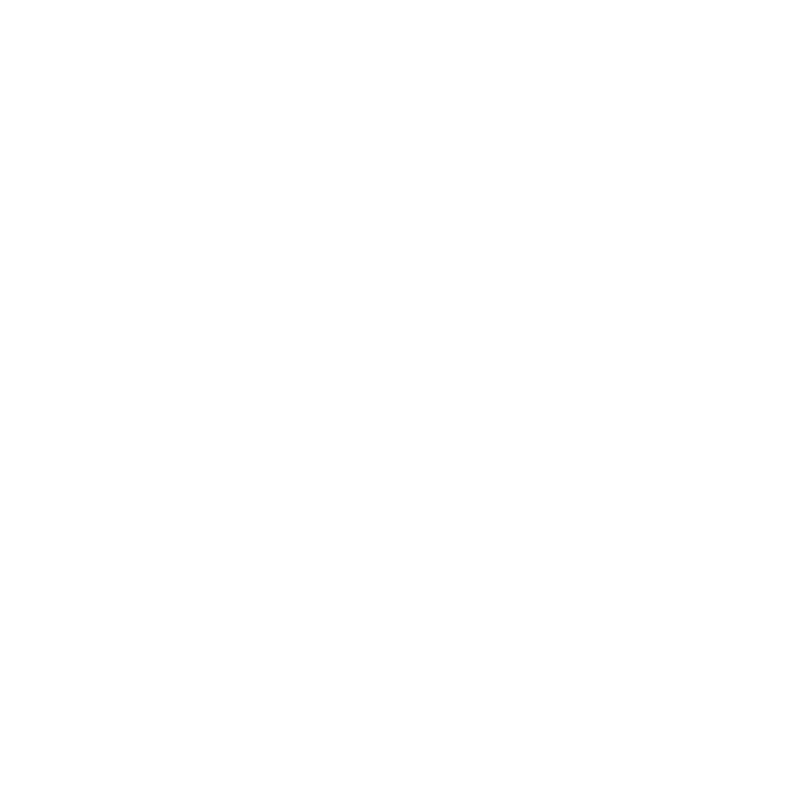

<IPython.core.display.Javascript object>


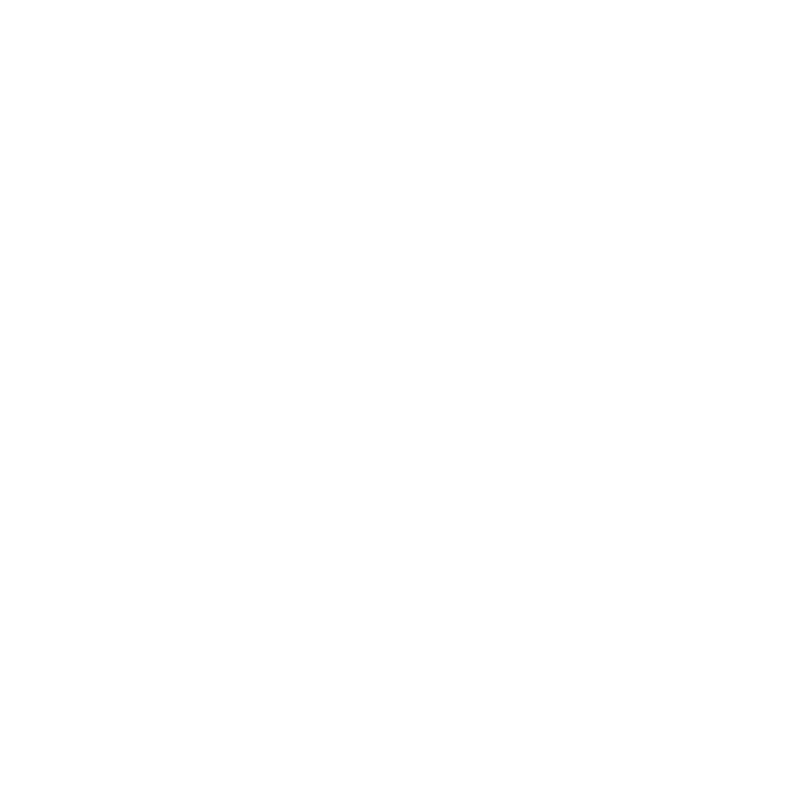

<IPython.core.display.Javascript object>


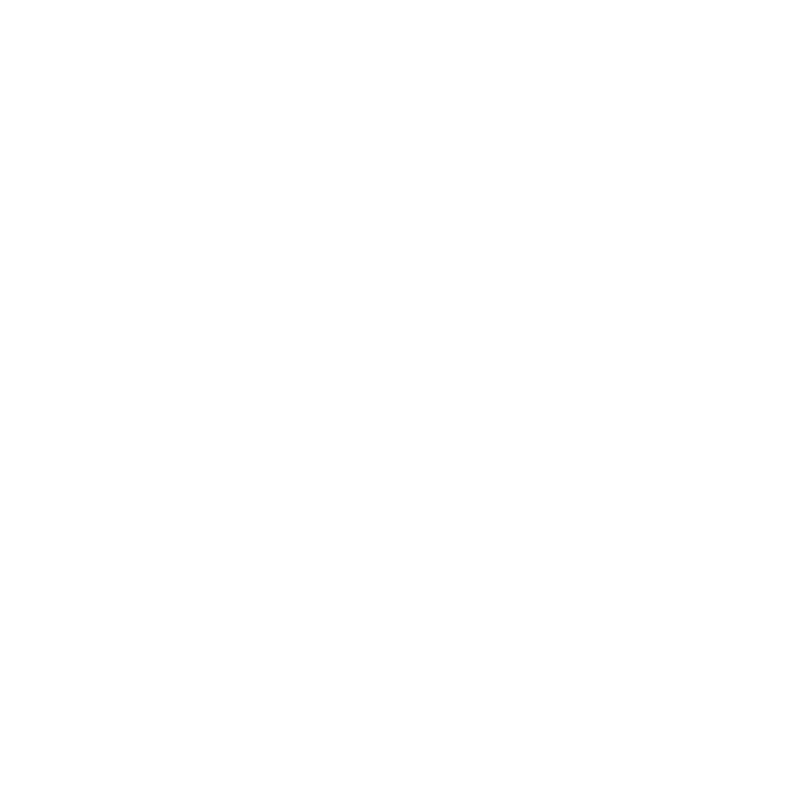

<IPython.core.display.Javascript object>


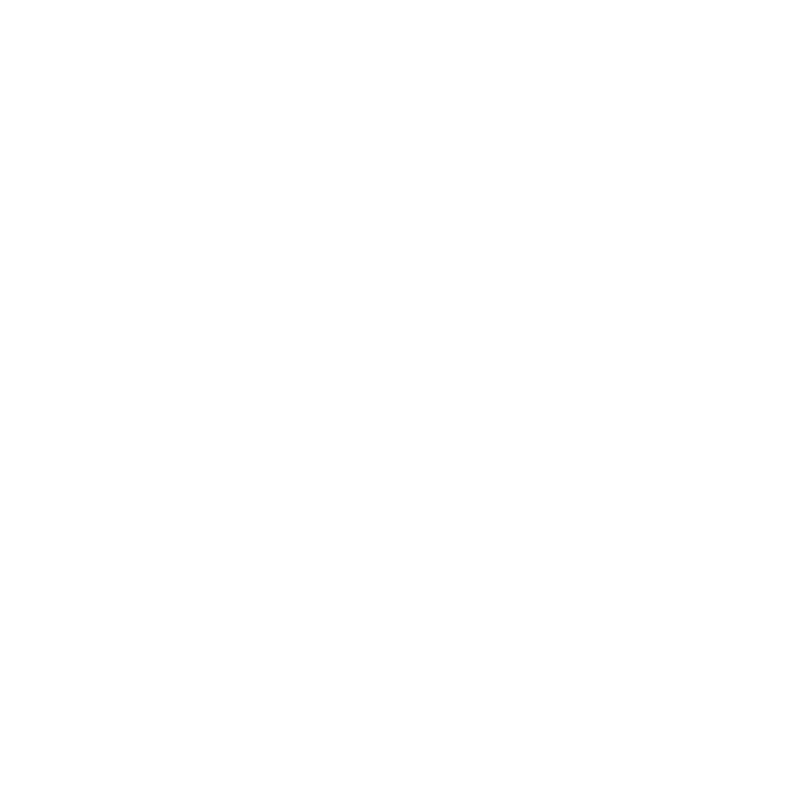

<IPython.core.display.Javascript object>


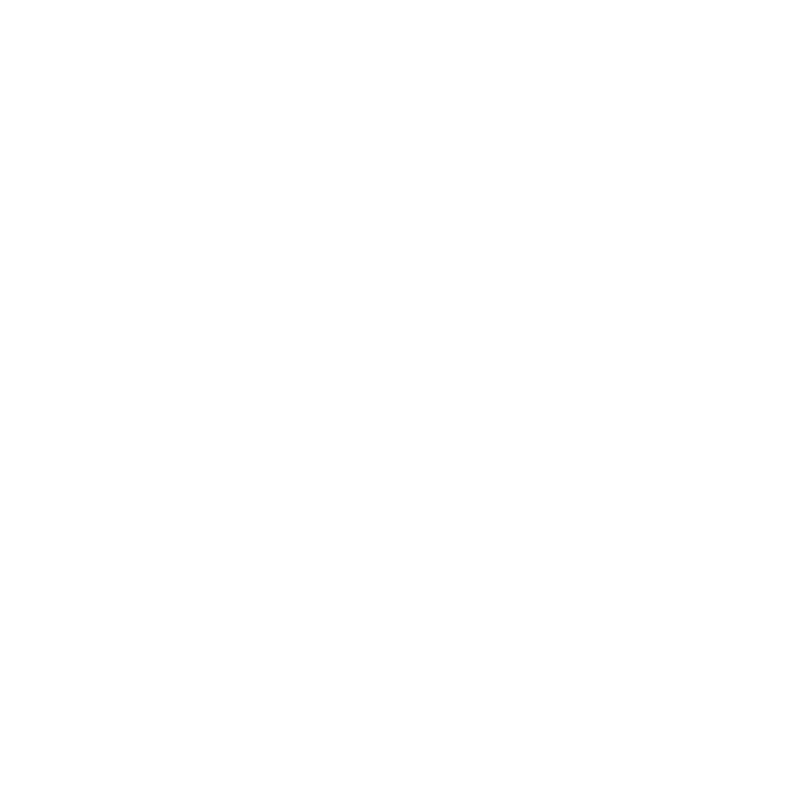

<IPython.core.display.Javascript object>


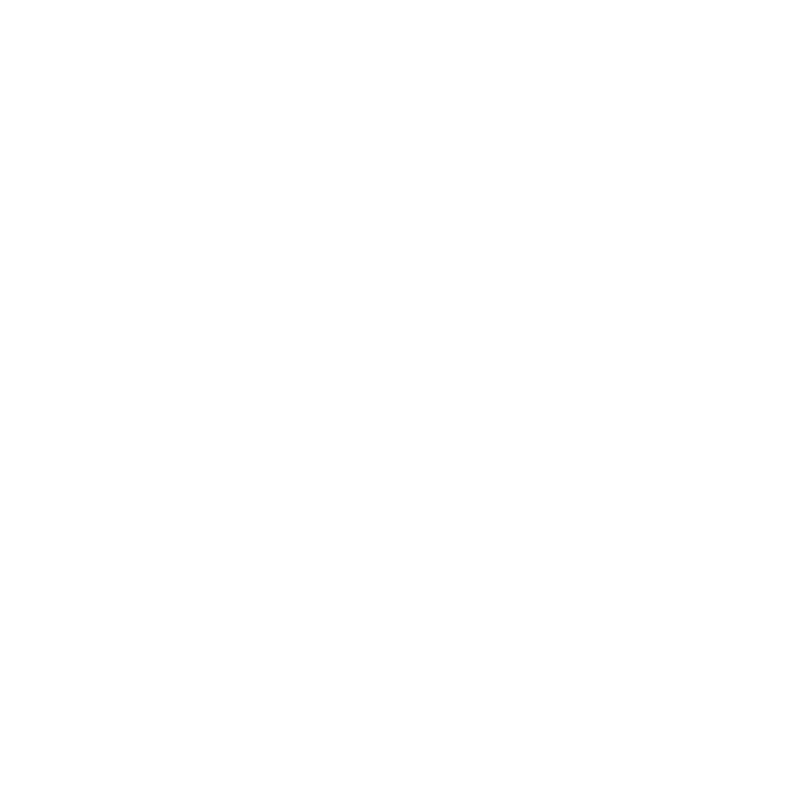

<IPython.core.display.Javascript object>


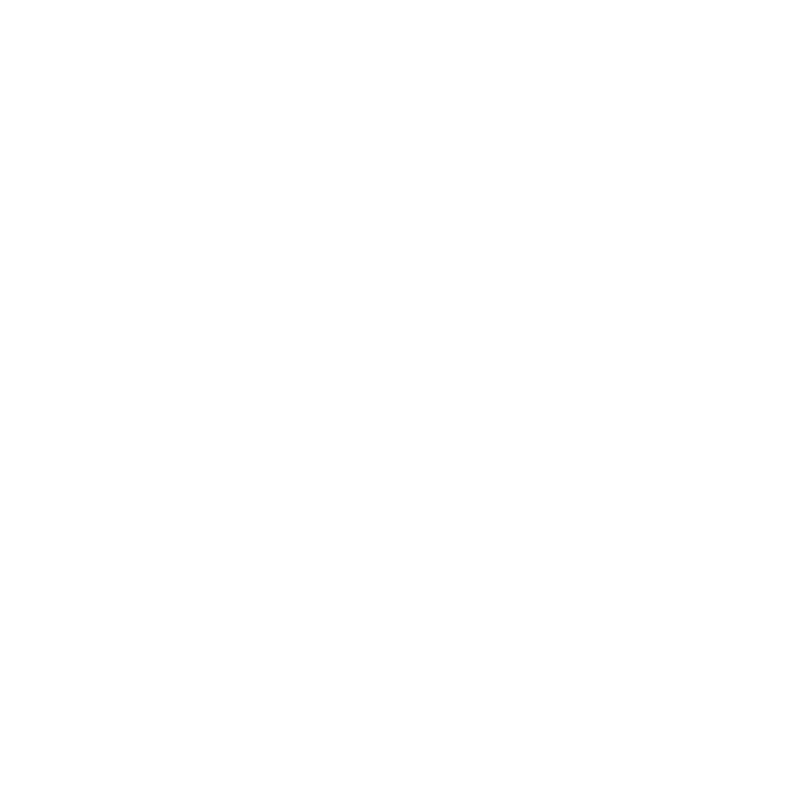

<IPython.core.display.Javascript object>


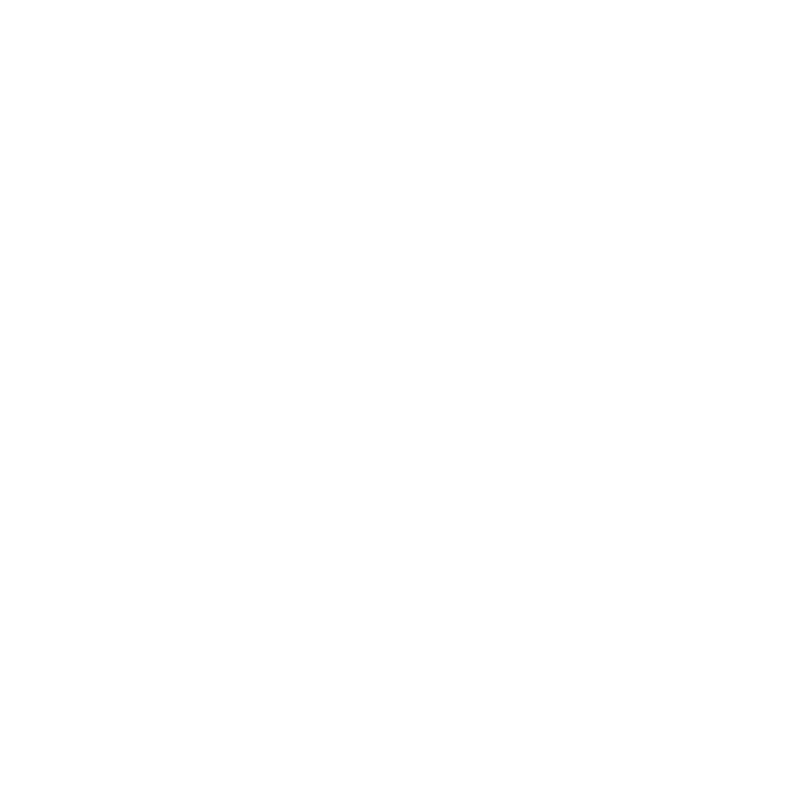

<IPython.core.display.Javascript object>


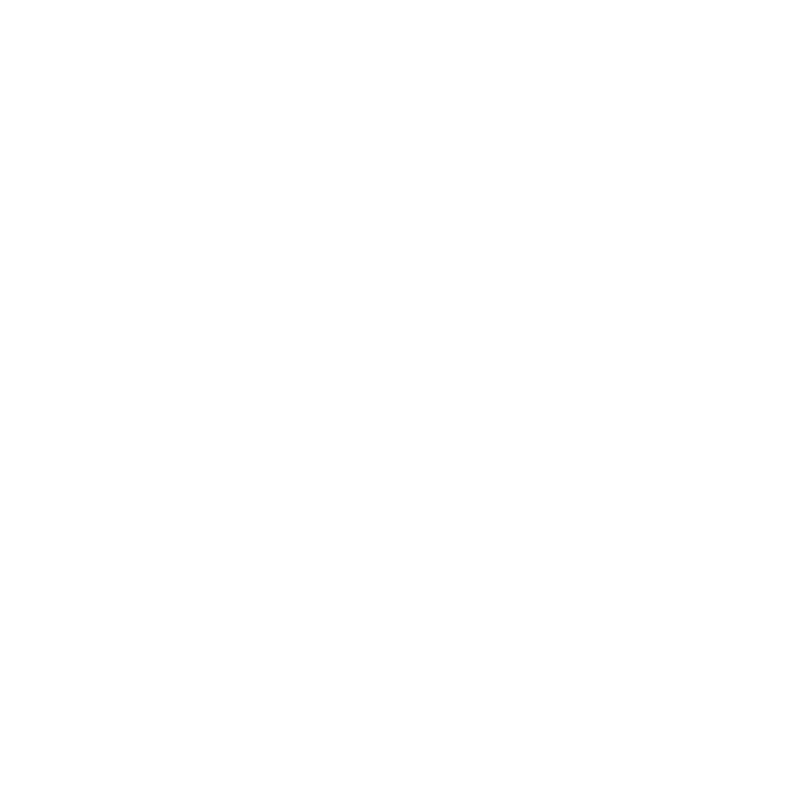

<IPython.core.display.Javascript object>


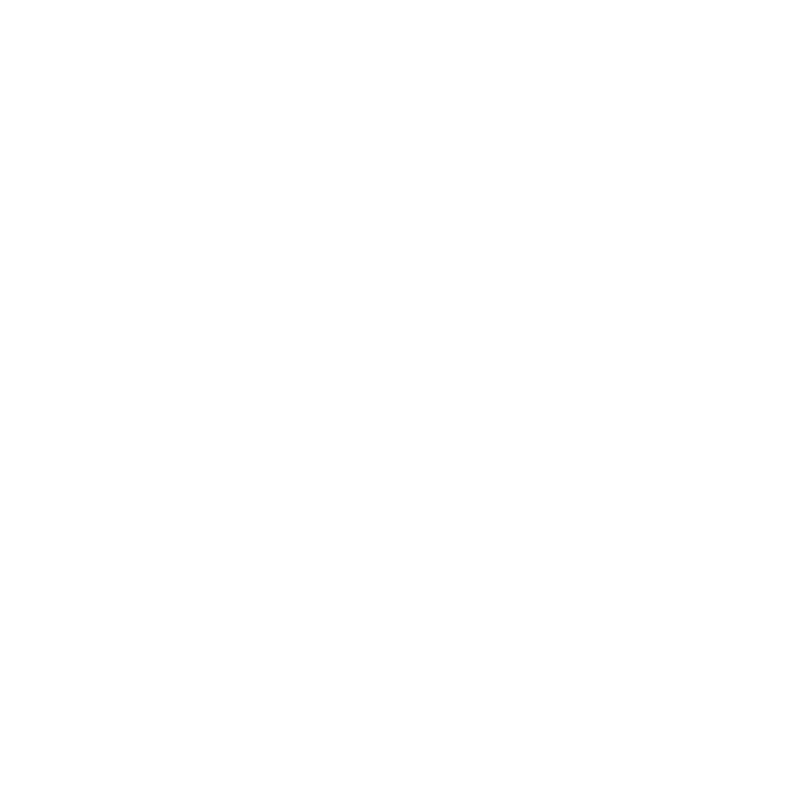

<IPython.core.display.Javascript object>


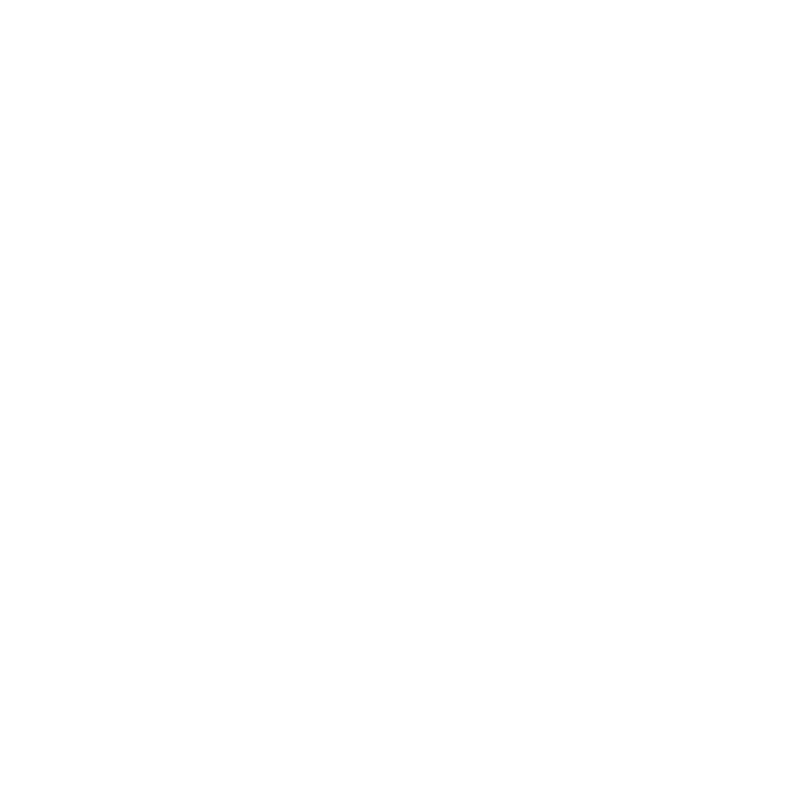

<IPython.core.display.Javascript object>


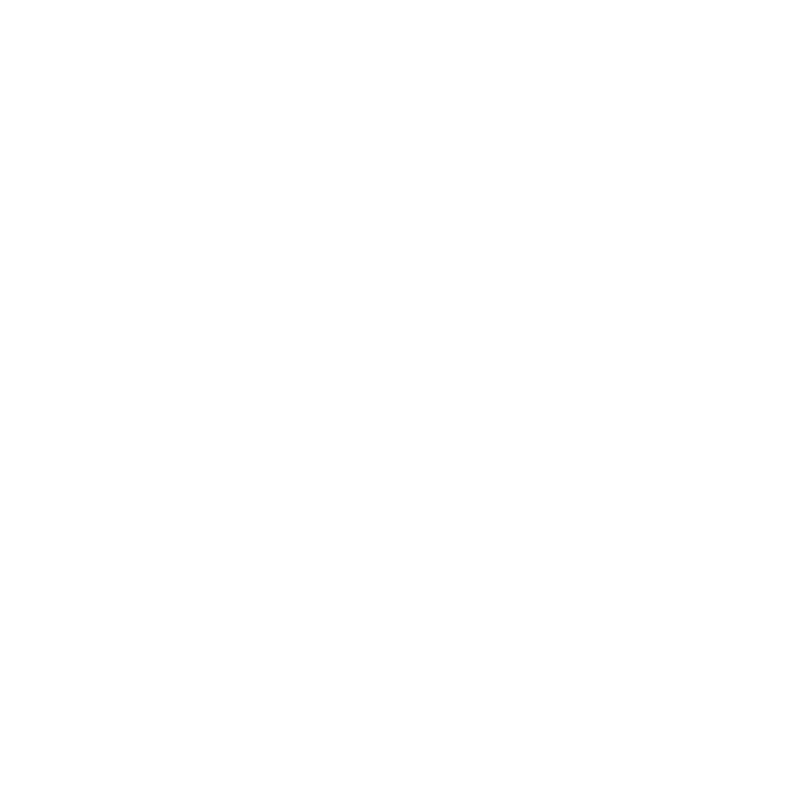

In [143]:
#subcat = 'adult'
for subcat in df_censorship.subcat.unique():
    df4 = df_filtered[df_filtered['subcat']==subcat].set_index('country')[['case1','case3']]
    if subcat == 'kids_and_teen':
        subcat = 'kids'
    model = 'scatter'
    fig2, ax2 = plt.subplots(1,1, figsize=(10,10))
    ax2.scatter(df4['case1'], df4['case3'])
    for label, x, y in zip(df4.index, df4['case1'], df4['case3']):
        ax2.annotate(
            label, 
            xy = (x, y), xytext = (-20, 20),
            textcoords = 'offset points', ha = 'right', va = 'bottom',
            bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
            arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))
    ax2.set_title(model + ' ' + subcat + ' case: 1,3')
    ax2.grid(1)
    fig2.savefig(RESULTS + "subcat/" + model + '-' + subcat)
    plt.close()

<IPython.core.display.Javascript object>


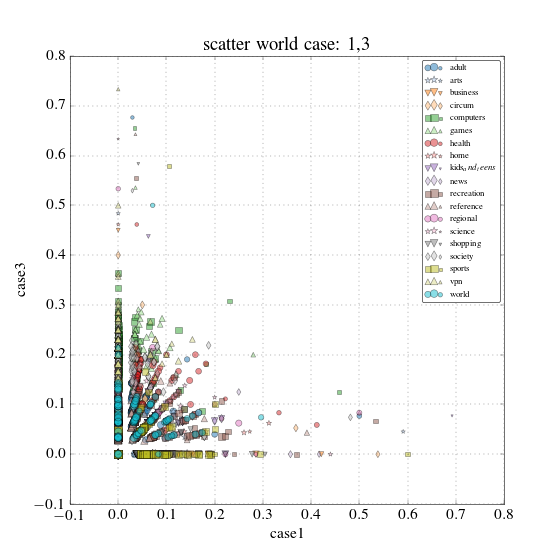

In [166]:
from itertools import cycle
tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),  
             (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),  
             (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),  
             (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),  
             (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]  
  
# Scale the RGB values to the [0, 1] range, which is the format matplotlib accepts.  
for i in range(len(tableau20)):  
    r, g, b = tableau20[i]  
    tableau20[i] = (r / 255., g / 255., b / 255.)  
    
col=cycle(tableau20)
mark=cycle(['o','*','v','d','s','^'])

fig2, ax2 = plt.subplots(1,1, figsize=(7,7))

#subcat = 'adult'
for subcat in df_censorship.subcat.unique():
    df4 = df_filtered[df_filtered['subcat']==subcat].set_index('country')[['case1','case3', 'case2']]
    if subcat == 'kids_and_teen':
        subcat = 'kids'
    model = 'scatter'
    
    ax2.scatter(df4['case1'], df4['case3'], c=col.next(), marker=mark.next(),
                s=df4['case2']*50, label=subcat, alpha=0.5, edgecolor=None)
    #for label, x, y in zip(df4.index, df4['case1'], df4['case3']):
    #    ax2.annotate(
    #        label, 
    #        xy = (x, y), xytext = (-20, 20),
    #        textcoords = 'offset points', ha = 'right', va = 'bottom',
    #        bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
    #        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))
ax2.set_title(model + ' ' + subcat + ' case: 1,3')
ax2.set_ylabel('case3')
ax2.set_xlabel('case1')
#ax2.set_xscale('log')
#ax2.set_yscale('log')
ax2.grid(1)
ax2.legend(loc='best')
fig2.savefig(RESULTS + model + '-global-density-by-subcat')

In [69]:
case1 = df_censorship.pivot(index='country', columns='subcat', values='case1')
case2 = df_censorship.pivot(index='country', columns='subcat', values='case2')
case3 = df_censorship.pivot(index='country', columns='subcat', values='case3')

mat1 = case1.as_matrix()
mat1 = case1.as_matrix()
mat1 = case1.as_matrix()

df4 = pd.DataFrame(pca.fit_transform(mat)).set_index(case1.index)

<IPython.core.display.Javascript object>


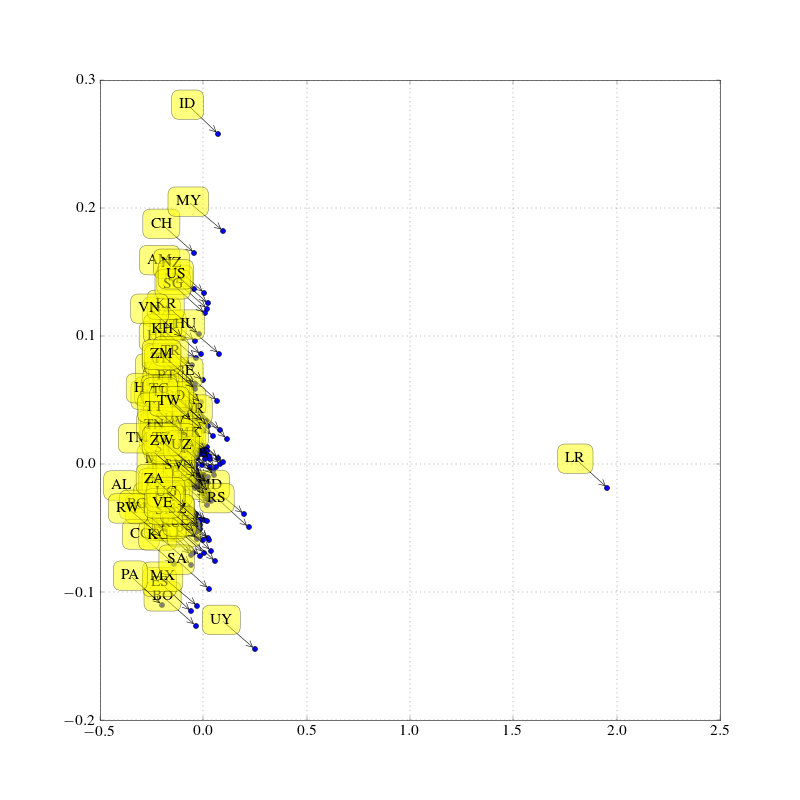

In [70]:
fig2, ax2 = plt.subplots(1,1, figsize=(10,10))
ax2.scatter(df4[0], df4[1])
for label, x, y in zip(df4.index, df4[0], df4[1]):
    ax2.annotate(
        label, 
        xy = (x, y), xytext = (-20, 20),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))
ax2.grid(1)
fig2.show()

## Case 1 and 3 on scatter plot for each subcat

# WORLD MAP

In [167]:
import numpy as np
#from world_map_maker import create_world_map

In [168]:
create_world_map(censorship_ratio['case1'], "Server to Client Blocking", True)

0.00863464651916 0.0651260504202
http://chart.apis.google.com/chart?cht=map:fixed=-60,-20,80,-35&chs=600x400&chma=0,60,0,0&chld=AA|AA|AA|AA|AA|AA|VPN|CIRCUM|REGIONAL|SCIENCE|COMPUTERS|HOME|SOCIETY|ARTS|REFERENCE|WORLD|GAMES|NEWS|BUSINESS|ADULT|KIDS_AND_TEENS|SPORTS|HEALTH|SHOPPING|RECREATION&chco=808080|808080|c6dbef|9ecae1|6baed6|3182bd|08519c|c6dbef|c6dbef|c6dbef|c6dbef|c6dbef|c6dbef|c6dbef|9ecae1|9ecae1|9ecae1|9ecae1|9ecae1|9ecae1|6baed6|6baed6|3182bd|3182bd|08519c|08519c&chdl=No+Data|0.9-2.0%|2.0-3.1%|3.1-4.3%|4.3-5.4%|5.4-6.5%&chdls=000000,14&chf=bg,s,EFF3FF&chtt=Server+to+Client+Blocking&chts=000000,20,c


In [169]:
create_world_map(censorship_ratio['case2'], "No Blocking", True)

0.663504464286 0.832755298651
http://chart.apis.google.com/chart?cht=map:fixed=-60,-20,80,-35&chs=600x400&chma=0,60,0,0&chld=AA|AA|AA|AA|AA|AA|GAMES|COMPUTERS|VPN|HEALTH|SOCIETY|NEWS|RECREATION|SHOPPING|SCIENCE|ADULT|HOME|REGIONAL|ARTS|WORLD|KIDS_AND_TEENS|CIRCUM|BUSINESS|REFERENCE|SPORTS&chco=808080|808080|c6dbef|9ecae1|6baed6|3182bd|08519c|c6dbef|c6dbef|c6dbef|c6dbef|c6dbef|c6dbef|c6dbef|c6dbef|c6dbef|c6dbef|c6dbef|c6dbef|c6dbef|c6dbef|c6dbef|c6dbef|c6dbef|c6dbef|9ecae1&chdl=No+Data|66.4-69.7%|69.7-73.1%|73.1-76.5%|76.5-79.9%|79.9-83.3%&chdls=000000,14&chf=bg,s,EFF3FF&chtt=No+Blocking&chts=000000,20,c


In [170]:
create_world_map(censorship_ratio['case3'], "Client to Server Blocking", True)

0.0136 0.211548839719
http://chart.apis.google.com/chart?cht=map:fixed=-60,-20,80,-35&chs=600x400&chma=0,60,0,0&chld=AA|AA|AA|AA|AA|AA|BUSINESS|SHOPPING|SPORTS|RECREATION|REFERENCE|KIDS_AND_TEENS|REGIONAL|HOME|NEWS|ARTS|WORLD|ADULT|CIRCUM|HEALTH|SCIENCE|SOCIETY|COMPUTERS|GAMES|VPN&chco=808080|808080|c6dbef|9ecae1|6baed6|3182bd|08519c|c6dbef|c6dbef|c6dbef|9ecae1|9ecae1|9ecae1|9ecae1|9ecae1|9ecae1|9ecae1|9ecae1|9ecae1|6baed6|6baed6|6baed6|08519c|08519c|08519c|08519c&chdl=No+Data|1.4-5.3%|5.3-9.3%|9.3-13.2%|13.2-17.2%|17.2-21.2%&chdls=000000,14&chf=bg,s,EFF3FF&chtt=Client+to+Server+Blocking&chts=000000,20,c
